In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from custom import *

In [2]:
train=pd.read_csv('train.csv')
sales=pd.read_csv('sales.csv')
brand=pd.read_csv('brand_keyword_cnt.csv')
product_info=pd.read_csv('product_info.csv')

In [3]:
train.head(3)

ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   

          브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
0  B002-00001           0           0           0           0  ...   
1  B002-00002           0           0           0           0  ...   
2  B002-00002           0           0           0           0  ...   

   2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
0           0           0           0           0           0           0   
1           0           0           0           1           3           2   
2           0           0           0           0           0           0   

   2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0           0           0           0           0  
1           0           0           2           0  
2           0           0           0           0  

[3 rows x 465 columns]

In [4]:
sales.head(3)

ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   

          브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
0  B002-00001           0           0           0           0  ...   
1  B002-00002           0           0           0           0  ...   
2  B002-00002           0           0           0           0  ...   

   2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
0           0           0           0           0           0           0   
1           0           0           0       22400       67200       44800   
2           0           0           0           0           0           0   

   2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0           0           0           0           0  
1           0           0       44800           0  
2           0           0           0           0  

[3 rows x 465 columns]

In [5]:
brand.head(3)

브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  2022-01-05  \
0  B002-00001     0.84131     0.91383     1.45053     2.42239     1.87119   
1  B002-00002    12.64868    20.27850    15.33217    12.75021    13.56251   
2  B002-00003     0.33362     0.43516     0.36263     0.17406     0.21758   

   2022-01-06  2022-01-07  2022-01-08  2022-01-09  ...  2023-03-26  \
0     1.58108     1.23295     1.17493     1.14592  ...     0.31911   
1    13.70757    11.93791    15.56425    14.08471  ...    10.26979   
2     0.46417     0.42065     0.29010     0.37713  ...     0.53669   

   2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  2023-04-01  \
0     0.39164     0.37713     0.49318     0.07252     0.29010     0.31911   
1    11.96692    10.64693    10.41485    10.48738     9.48651     9.28343   
2     0.69625     0.44966     0.39164     1.02988     0.49318     0.91383   

   2023-04-02  2023-04-03  2023-04-04  
0     0.23208     0.33362     0.44966  
1    10.42935    11.15462    11.38671  
2     0.79779     1.01537     0.88482  

[3 rows x 460 columns]

In [6]:
product_info.head(3)

제품                                               제품특성
0  B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1  B002-02376-00001                                        700mg x 28정
2  B002-03735-00001  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Columns: 465 entries, ID to 2023-04-04
dtypes: int64(460), object(5)
memory usage: 56.4+ MB


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Columns: 465 entries, ID to 2023-04-04
dtypes: int64(460), object(5)
memory usage: 56.4+ MB


In [9]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Columns: 460 entries, 브랜드 to 2023-04-04
dtypes: float64(459), object(1)
memory usage: 11.1+ MB


In [10]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12778 entries, 0 to 12777
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품      12778 non-null  object
 1   제품특성    12778 non-null  object
dtypes: object(2)
memory usage: 199.8+ KB


In [11]:
train.value_counts('브랜드')

브랜드
B002-00266    153
B002-00894    153
B002-00680    148
B002-00434    136
B002-02052    113
             ... 
B002-01985      1
B002-00425      1
B002-01982      1
B002-01978      1
B002-00001      1
Length: 3170, dtype: int64

In [12]:
train.value_counts('제품')

제품
B002-00070-00009    2
B002-01083-00002    2
B002-03481-00001    2
B002-03796-00008    2
B002-01523-00045    2
                   ..
B002-01277-00015    1
B002-01277-00016    1
B002-01277-00017    1
B002-01277-00018    1
B002-03799-00010    1
Length: 15840, dtype: int64

In [13]:
train.value_counts('대분류')

대분류
B002-C001-0002    10954
B002-C001-0001     3768
B002-C001-0005      613
B002-C001-0003      444
B002-C001-0004      111
dtype: int64

#### 분류별 분포

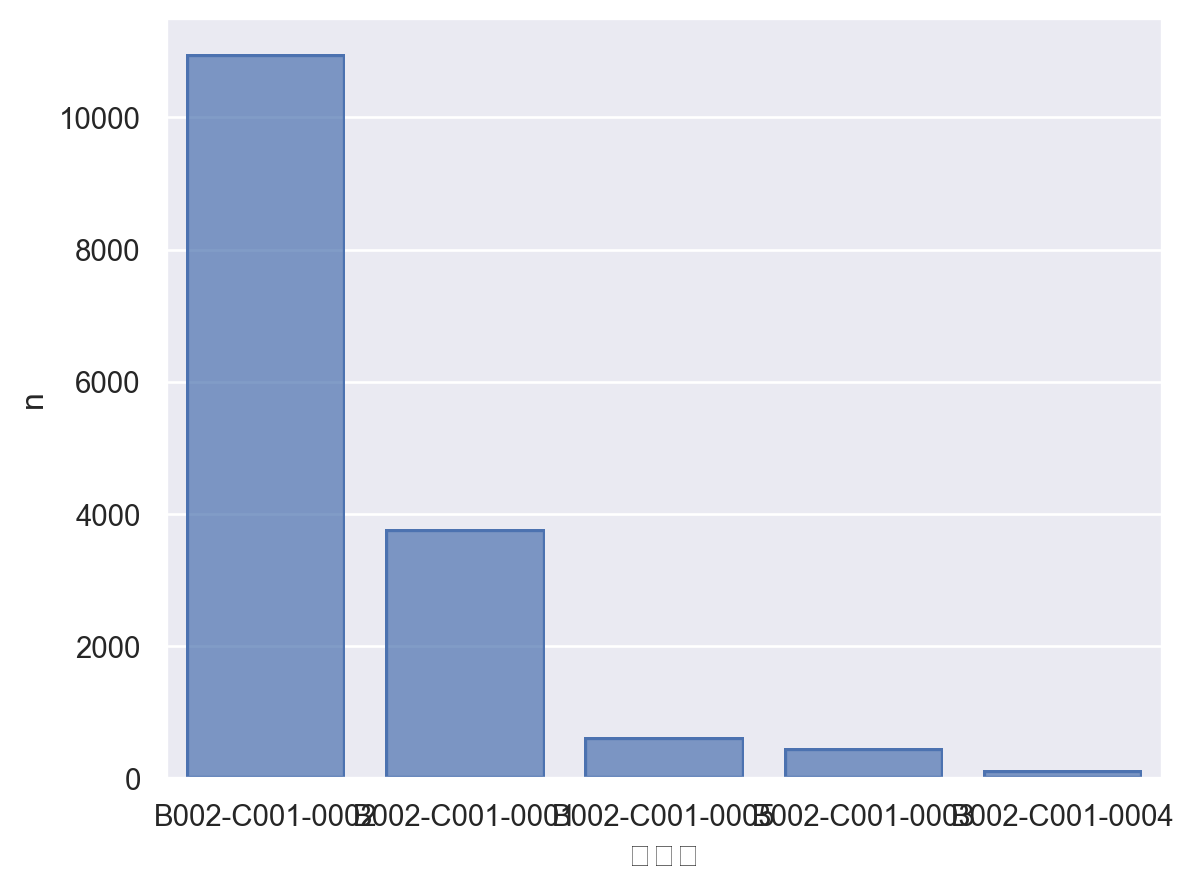

In [14]:
(
    so.Plot(train.value_counts('대분류').reset_index(name='n'),x='대분류',y='n')
    .add(so.Bar())
)

In [15]:
train.value_counts('중분류')

중분류
B002-C002-0001    3608
B002-C002-0007    2501
B002-C002-0005    2275
B002-C002-0006    1675
B002-C002-0003    1516
B002-C002-0004    1168
B002-C002-0009    1144
B002-C002-0002     946
B002-C002-0011     613
B002-C002-0008     410
B002-C002-0010      34
dtype: int64

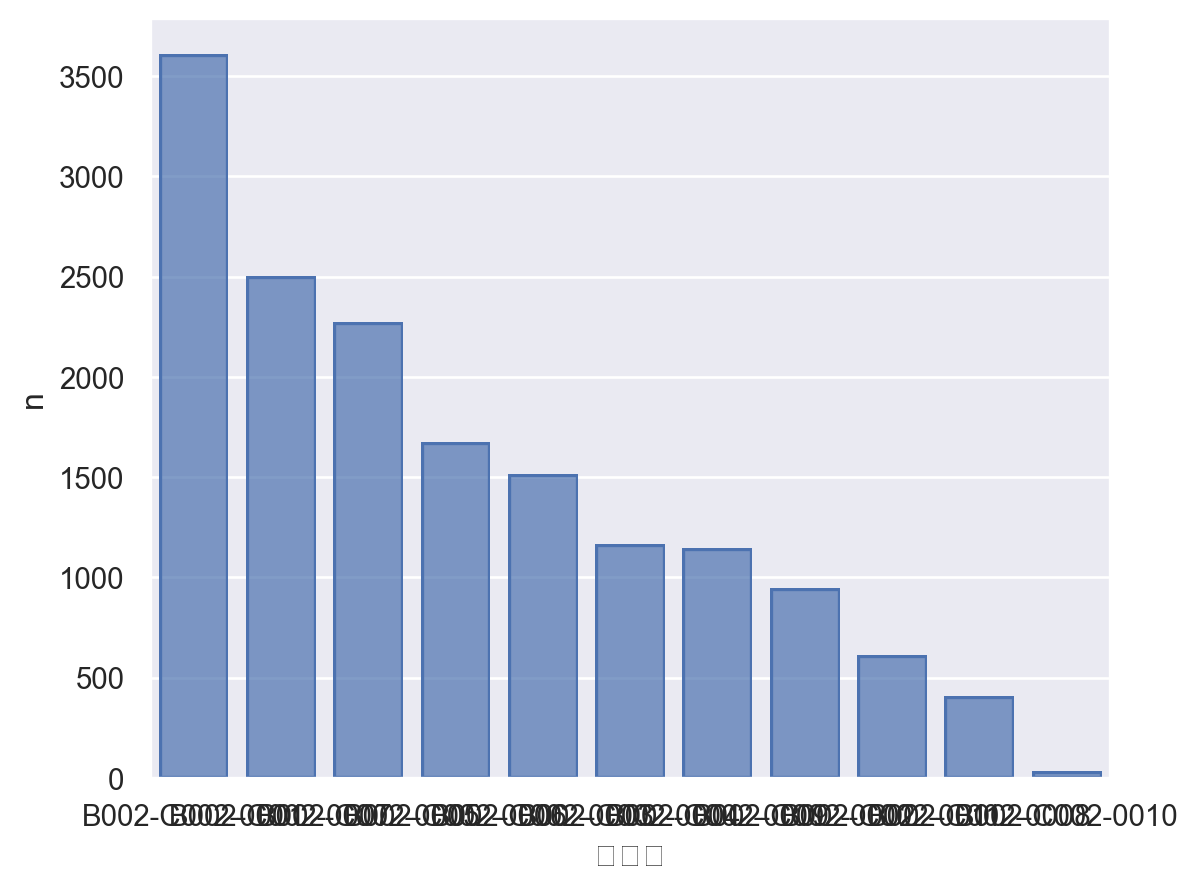

In [16]:
(
    so.Plot(train.value_counts('중분류').reset_index(name='n'),x='중분류',y='n')
    .add(so.Bar())
)

In [17]:
train.value_counts('소분류')

소분류
B002-C003-0003    1426
B002-C003-0034    1020
B002-C003-0001     751
B002-C003-0025     690
B002-C003-0002     663
B002-C003-0035     641
B002-C003-0015     466
B002-C003-0040     451
B002-C003-0039     432
B002-C003-0038     431
B002-C003-0004     426
B002-C003-0027     408
B002-C003-0052     392
B002-C003-0041     366
B002-C003-0023     365
B002-C003-0036     362
B002-C003-0022     356
B002-C003-0016     342
B002-C003-0005     342
B002-C003-0045     294
B002-C003-0024     289
B002-C003-0032     265
B002-C003-0007     262
B002-C003-0014     236
B002-C003-0044     234
B002-C003-0046     223
B002-C003-0017     222
B002-C003-0053     221
B002-C003-0029     198
B002-C003-0021     195
B002-C003-0049     194
B002-C003-0037     184
B002-C003-0009     183
B002-C003-0033     180
B002-C003-0006     175
B002-C003-0028     174
B002-C003-0048     162
B002-C003-0051     160
B002-C003-0030     153
B002-C003-0026     150
B002-C003-0019     140
B002-C003-0043     117
B002-C003-0010     113
B002-C0

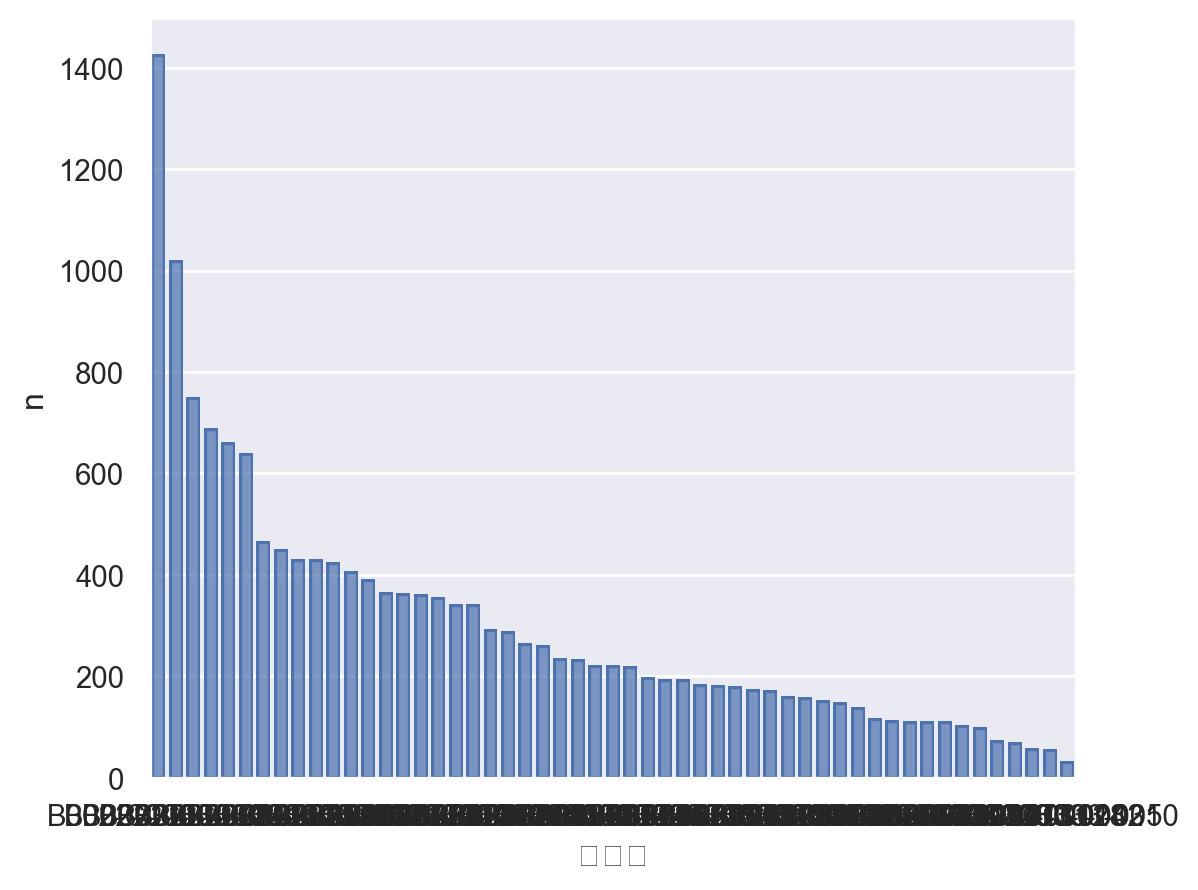

In [18]:
(
    so.Plot(train.value_counts('소분류').reset_index(name='n'),x='소분류',y='n')
    .add(so.Bar())
)

분류별로 갯수 차이가 매우 크게 남.

In [19]:
train.value_counts('브랜드')

브랜드
B002-00266    153
B002-00894    153
B002-00680    148
B002-00434    136
B002-02052    113
             ... 
B002-01985      1
B002-00425      1
B002-01982      1
B002-01978      1
B002-00001      1
Length: 3170, dtype: int64

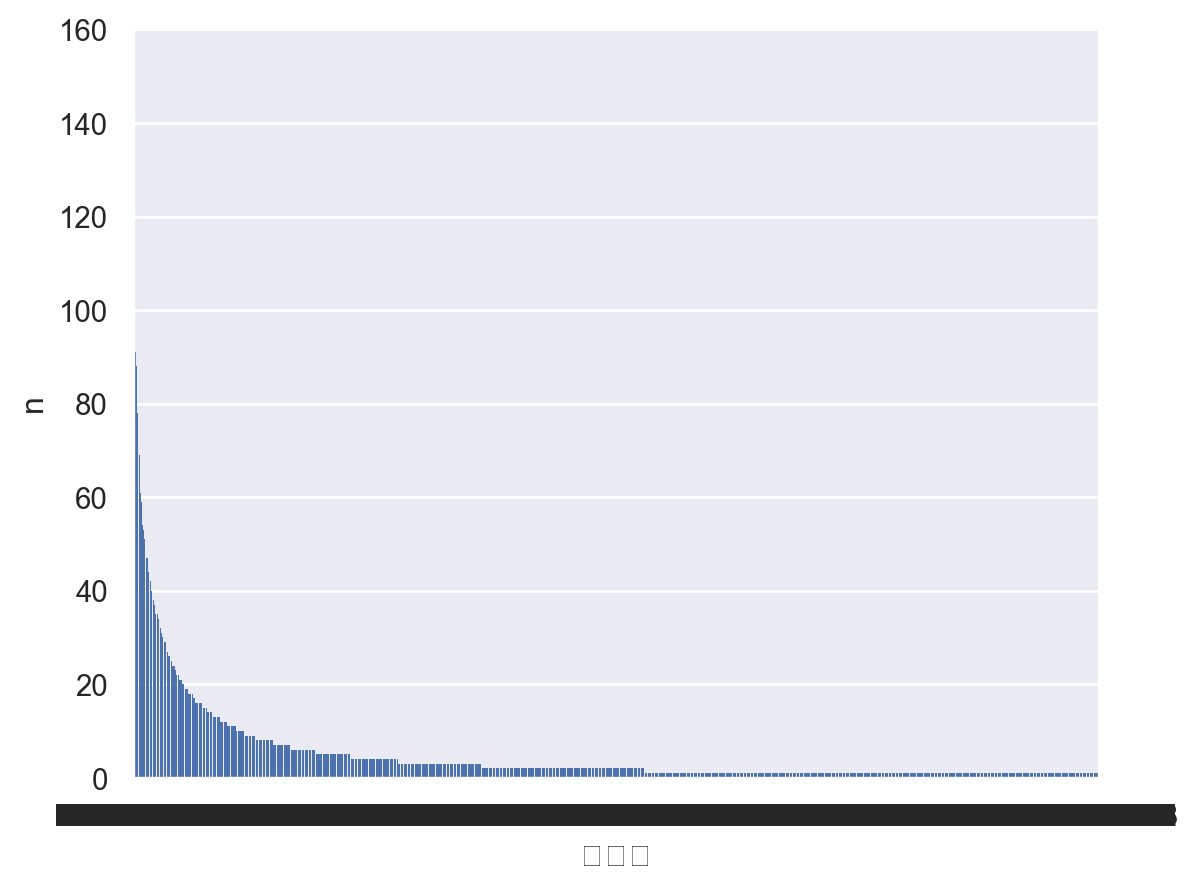

In [20]:
(
    so.Plot(train.value_counts('브랜드').reset_index(name='n'),x='브랜드',y='n')
    .add(so.Bar())
)

In [21]:
print(train['제품'].nunique())
print(train['대분류'].nunique())
print(train['중분류'].nunique())
print(train['소분류'].nunique())
print(train['브랜드'].nunique())

15840
5
11
53
3170


In [22]:
train.groupby(['대분류','중분류','소분류'])['제품'].size()

대분류             중분류             소분류           
B002-C001-0001  B002-C002-0001  B002-C003-0001     751
                                B002-C003-0002     663
                                B002-C003-0003    1426
                                B002-C003-0004     426
                                B002-C003-0005     342
                B002-C002-0009  B002-C003-0051     160
B002-C001-0002  B002-C002-0002  B002-C003-0006     175
                                B002-C003-0007     262
                                B002-C003-0008     112
                                B002-C003-0009     183
                                B002-C003-0010     113
                                B002-C003-0011     101
                B002-C002-0003  B002-C003-0012      75
                                B002-C003-0013     104
                                B002-C003-0014     236
                                B002-C003-0015     466
                                B002-C003-0016     342
                  

대분류, 중분류, 소분류 는 각각 5,11,53개이고 각각의 갯수는 불균형 적임.

데이터 분석을 위한 데이터 transpose

In [23]:
train_long=train.melt(
    id_vars=['ID','제품','대분류','중분류','소분류','브랜드'],
    var_name='date',
    value_name='판매량'
)
train_long

ID                제품             대분류             중분류  \
0            0  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1            1  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2            2  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3            3  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4            4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
...        ...               ...             ...             ...   
7293505  15885  B002-03799-00002  B002-C001-0003  B002-C002-0008   
7293506  15886  B002-03799-00003  B002-C001-0003  B002-C002-0008   
7293507  15887  B002-03799-00004  B002-C001-0003  B002-C002-0008   
7293508  15888  B002-03799-00005  B002-C001-0003  B002-C002-0008   
7293509  15889  B002-03799-00010  B002-C001-0002  B002-C002-0004   

                    소분류         브랜드        date  판매량  
0        B002-C003-0038  B002-00001  2022-01-01    0  
1        B002-C003-0044  B002-00002  2022-01-01    0  
2        B002-C003-0044  B002-00002  2022-01-01    0  
3        B002-C003-0044  B002-00002  2022-01-01    0  
4        B002-C003-0003  B002-00003  2022-01-01    0  
...                 ...         ...         ...  ...  
7293505  B002-C003-0042  B002-03799  2023-04-04    0  
7293506  B002-C003-0044  B002-03799  2023-04-04    3  
7293507  B002-C003-0044  B002-03799  2023-04-04    0  
7293508  B002-C003-0044  B002-03799  2023-04-04    2  
7293509  B002-C003-0020  B002-03799  2023-04-04    0  

[7293510 rows x 8 columns]

In [24]:
idx=train_long['date'].isin( ['2022-01-01','2022-01-31','2022-02-01','2022-02-02','2022-03-01','2022-03-09','2022-05-05','2022-05-08','2022-06-01','2022-06-06','2022-08-15','2022-09-09','2022-09-10','2022-09-11','2022-09-12',
                       '2022-10-03','2022-10-09','2022-10-10','2022-12-25','2023-01-21','2023-01-22','2023-01-23','2023-01-24',
                      '2023-03-01','2023-04-05'])

In [25]:
#년, 월 , 일 ,요일, 휴일 (설날, 추석, 크리스마스 등) 추가

def clean_data(df):
    df.rename({"dteday": "date", "cnt": "count"}, axis=1, inplace=True)
    df["date"] = pd.to_datetime(df["date"])  

    df["year"] = df["date"].dt.year
    df["day"] = df["date"].dt.day_of_year
    df['Day'] = df['date'].dt.day

    return df

train_long=clean_data(train_long)
train_long = train_long.assign(
    wday = lambda x: x["date"].dt.day_name().str[:3],
    month = lambda x: x["date"].dt.month_name().str[:3],
    year = lambda x: x["date"].dt.year.astype(str),
    day = lambda x: x["date"].dt.day_of_year,
    Day = lambda x: x["date"].dt.day,
    holiday = lambda x: np.where(idx, 'Yes', 'No')
)
train_long.head(3)

ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   

          브랜드       date  판매량  year  day  Day wday month holiday  
0  B002-00001 2022-01-01    0  2022    1    1  Sat   Jan     Yes  
1  B002-00002 2022-01-01    0  2022    1    1  Sat   Jan     Yes  
2  B002-00002 2022-01-01    0  2022    1    1  Sat   Jan     Yes

### 판매량 분포

In [26]:
train_long.value_counts('판매량')

판매량
0         4652860
1          353710
2          278846
3          207127
4          179238
           ...   
4725            1
4724            1
4720            1
4717            1
200420          1
Length: 4887, dtype: int64

50% 이상이 판매량 0임.

In [27]:
train_all=train_long.groupby('date')['판매량'].sum().reset_index()
train_all

date     판매량
0   2022-01-01  204782
1   2022-01-02  165556
2   2022-01-03  143218
3   2022-01-04  146044
4   2022-01-05  178035
..         ...     ...
454 2023-03-31  122453
455 2023-04-01  113185
456 2023-04-02  110840
457 2023-04-03  143651
458 2023-04-04  159393

[459 rows x 2 columns]

전체 상품 판매량 분포

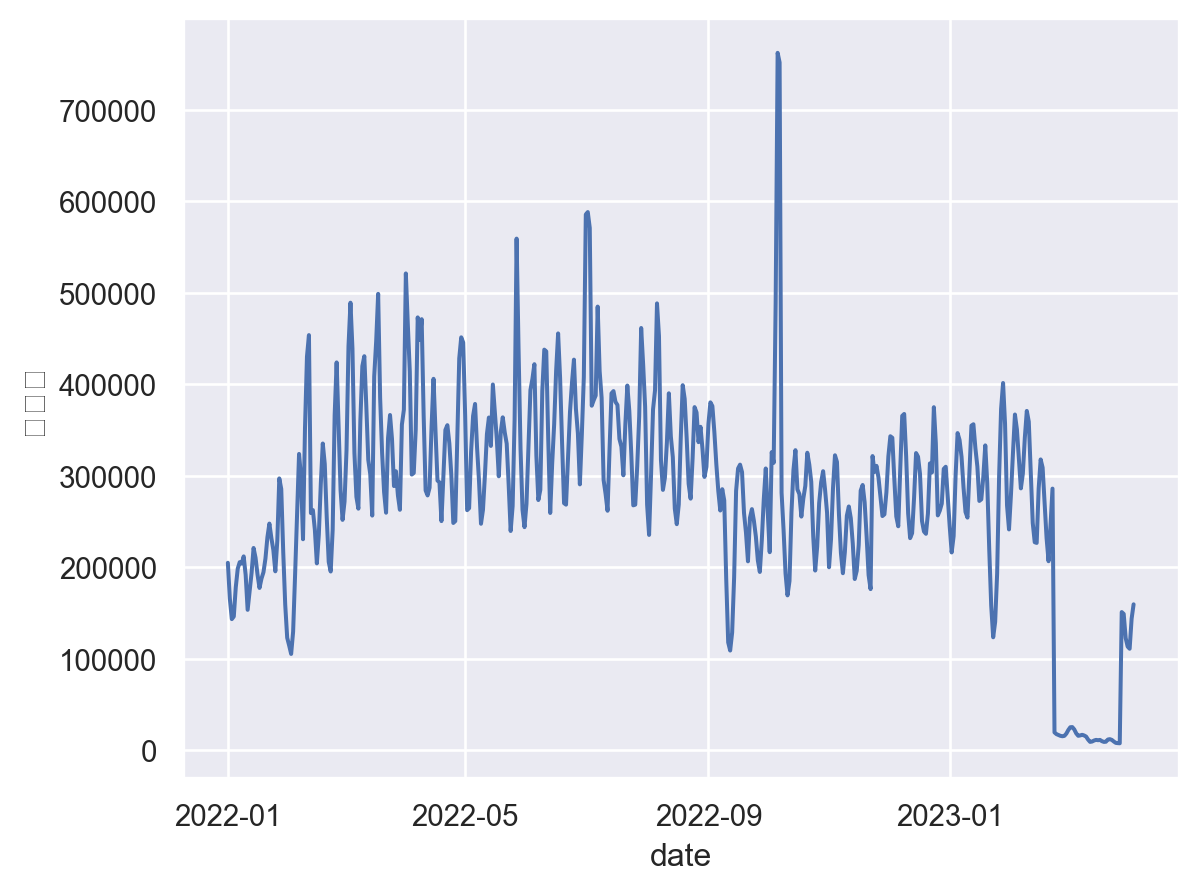

In [28]:
(
    so.Plot(train_all,x='date',y='판매량')
    .add(so.Line())
)

In [29]:
train_all.query('판매량 <30000')

date    판매량
418 2023-02-23  19422
419 2023-02-24  17532
420 2023-02-25  16547
421 2023-02-26  15647
422 2023-02-27  15216
423 2023-02-28  15603
424 2023-03-01  18118
425 2023-03-02  22056
426 2023-03-03  25057
427 2023-03-04  25232
428 2023-03-05  22662
429 2023-03-06  18340
430 2023-03-07  15697
431 2023-03-08  16105
432 2023-03-09  16782
433 2023-03-10  16049
434 2023-03-11  14839
435 2023-03-12  11515
436 2023-03-13   9046
437 2023-03-14   9431
438 2023-03-15  10518
439 2023-03-16  11230
440 2023-03-17  10887
441 2023-03-18  11173
442 2023-03-19   9824
443 2023-03-20   9020
444 2023-03-21   9223
445 2023-03-22  11641
446 2023-03-23  12034
447 2023-03-24  11211
448 2023-03-25   9457
449 2023-03-26   7972
450 2023-03-27   7679
451 2023-03-28   7527

In [30]:
train_all.query('판매량  >600000')

date     판매량
278 2022-10-06  762097
279 2022-10-07  751579

이상치 날짜 2022년 10-6 - 10-7,2023년 2-23 - 3-28

대분류 별 판매량 분포

In [31]:
train_big=train_long.groupby(['대분류','date'])['판매량'].sum().reset_index(name='판매량')
train_big

대분류       date    판매량
0     B002-C001-0001 2022-01-01  84536
1     B002-C001-0001 2022-01-02  73870
2     B002-C001-0001 2022-01-03  57336
3     B002-C001-0001 2022-01-04  54769
4     B002-C001-0001 2022-01-05  66988
...              ...        ...    ...
2290  B002-C001-0005 2023-03-31   9639
2291  B002-C001-0005 2023-04-01   5721
2292  B002-C001-0005 2023-04-02   4007
2293  B002-C001-0005 2023-04-03   6736
2294  B002-C001-0005 2023-04-04   4697

[2295 rows x 3 columns]

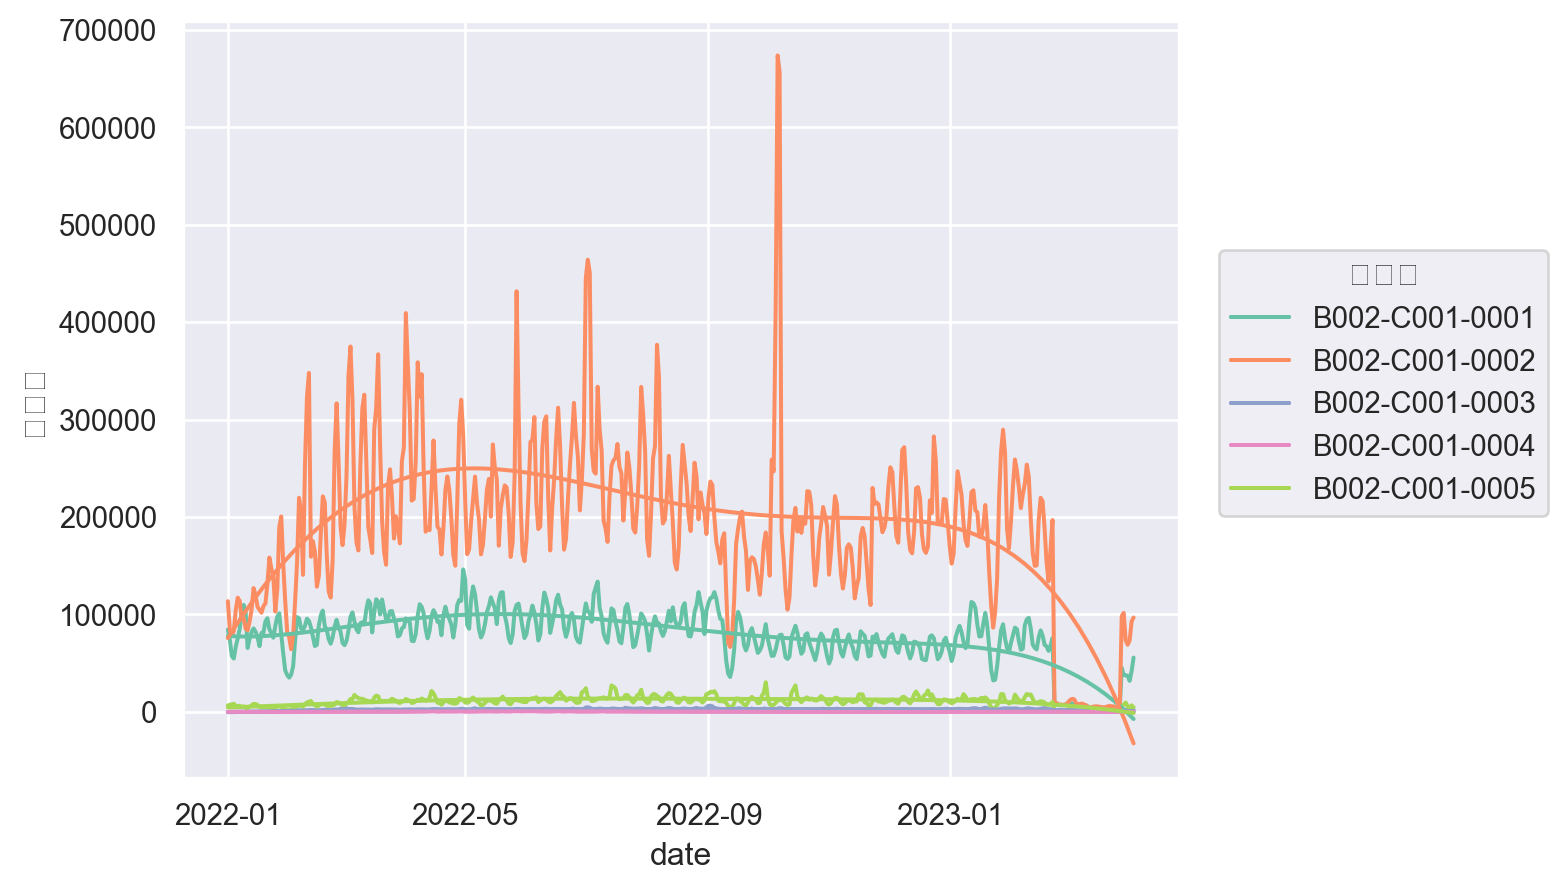

In [32]:
(
     so.Plot(train_big,x='date',y='판매량',color='대분류')
    .add(so.Line())
    .add(so.Line(),so.PolyFit(5))
    .scale(color='Set2')
)

In [33]:
train_big.query('판매량 > 500000')

대분류       date     판매량
737  B002-C001-0002 2022-10-06  673765
738  B002-C001-0002 2022-10-07  656542

10/6-10/7에는 특정 상품이 판매량이 많아서 튀는 것임.  
2/23-3/28에는 전체적으로 판매량이 급감함.

### 10/6-10/7 데이터

In [34]:
train_middle=train_long.groupby(['대분류','중분류','date'])['판매량'].sum().reset_index(name='판매량')
train_middle=train_middle.query('대분류 == "B002-C001-0002"')
train_middle

대분류             중분류       date   판매량
918   B002-C001-0002  B002-C002-0002 2022-01-01  2532
919   B002-C001-0002  B002-C002-0002 2022-01-02  2335
920   B002-C001-0002  B002-C002-0002 2022-01-03  2045
921   B002-C001-0002  B002-C002-0002 2022-01-04  2110
922   B002-C001-0002  B002-C002-0002 2022-01-05  2618
...              ...             ...        ...   ...
4126  B002-C001-0002  B002-C002-0009 2023-03-31  2596
4127  B002-C001-0002  B002-C002-0009 2023-04-01  2572
4128  B002-C001-0002  B002-C002-0009 2023-04-02  2015
4129  B002-C001-0002  B002-C002-0009 2023-04-03  2889
4130  B002-C001-0002  B002-C002-0009 2023-04-04  3116

[3213 rows x 4 columns]

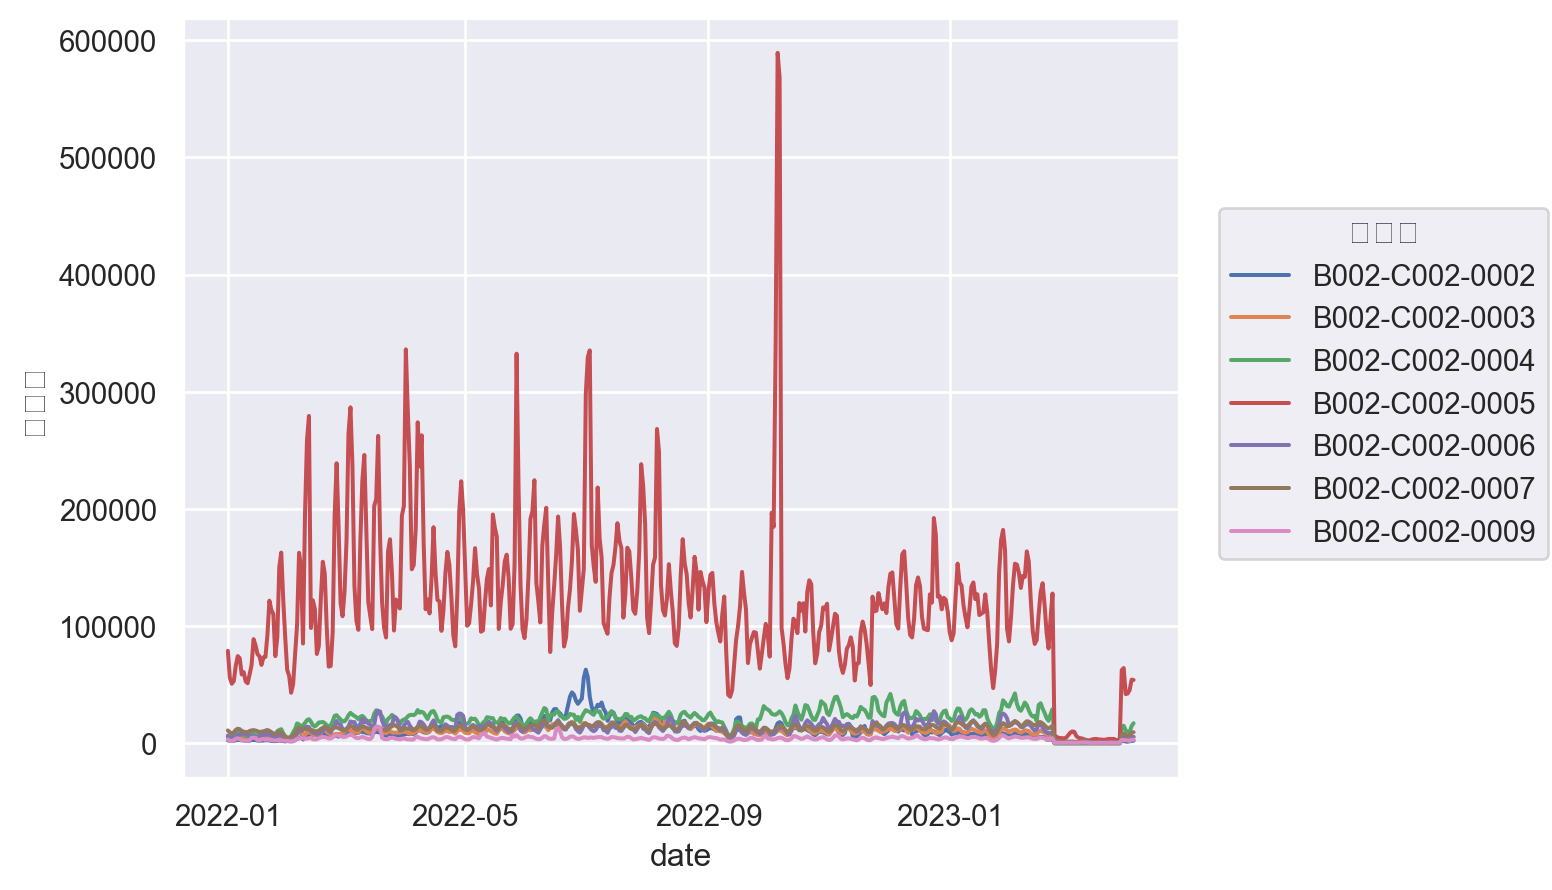

In [35]:
(
    so.Plot(train_middle,x='date',y='판매량',color='중분류')
    .add(so.Line())
)

In [57]:
train_small=train_long.groupby(['대분류','중분류','소분류','date'])['판매량'].sum().reset_index(name='판매량')
train_small=train_small.query('대분류 == "B002-C001-0002" and 중분류 == "B002-C002-0005"')
train_small

대분류             중분류             소분류       date    판매량
11016  B002-C001-0002  B002-C002-0005  B002-C003-0024 2022-01-01   2605
11017  B002-C001-0002  B002-C002-0005  B002-C003-0024 2022-01-02   2210
11018  B002-C001-0002  B002-C002-0005  B002-C003-0024 2022-01-03   2192
11019  B002-C001-0002  B002-C002-0005  B002-C003-0024 2022-01-04   2428
11020  B002-C001-0002  B002-C002-0005  B002-C003-0024 2022-01-05   3204
...               ...             ...             ...        ...    ...
14224  B002-C001-0002  B002-C002-0005  B002-C003-0041 2023-03-31  18331
14225  B002-C001-0002  B002-C002-0005  B002-C003-0041 2023-04-01  21079
14226  B002-C001-0002  B002-C002-0005  B002-C003-0041 2023-04-02  20816
14227  B002-C001-0002  B002-C002-0005  B002-C003-0041 2023-04-03  22794
14228  B002-C001-0002  B002-C002-0005  B002-C003-0041 2023-04-04  26599

[3213 rows x 5 columns]

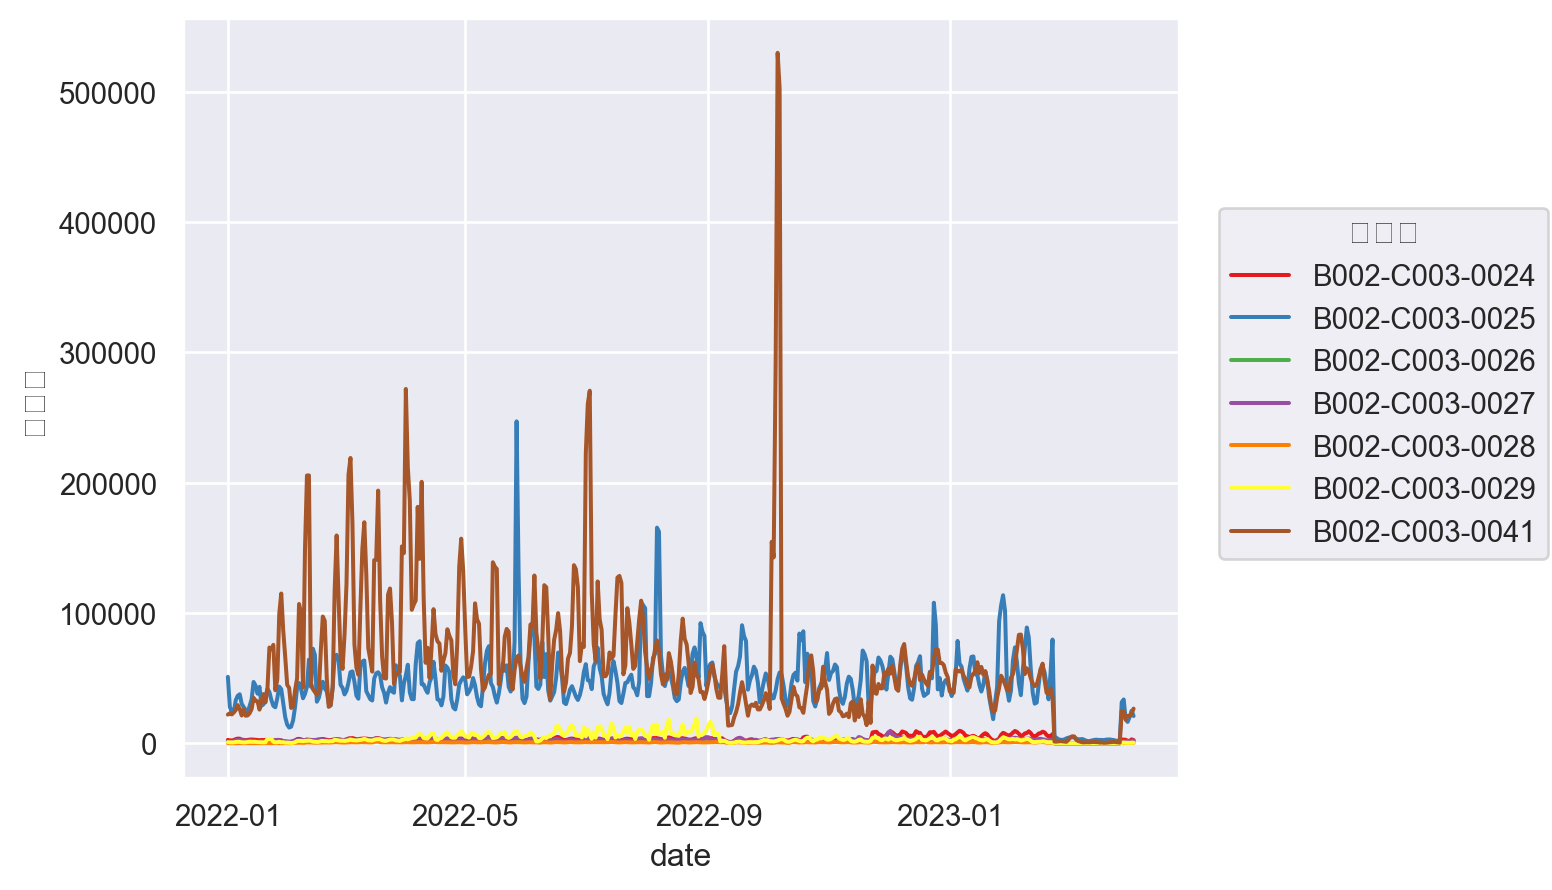

In [58]:
(
    so.Plot(train_small,x='date',y='판매량',color='소분류')
    .add(so.Line())
    .scale(color='Set1')
)

In [59]:
train_brand=train_long.groupby(['제품','대분류','중분류','소분류','브랜드','date'])['판매량'].sum().reset_index(name='판매량')
train_brand=train_brand.query('대분류 == "B002-C001-0002" and 중분류 == "B002-C002-0005" and 소분류 == "B002-C003-0041"')
train_brand

제품             대분류             중분류             소분류  \
382806   B002-00236-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
382807   B002-00236-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
382808   B002-00236-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
382809   B002-00236-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
382810   B002-00236-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
...                   ...             ...             ...             ...   
6914371  B002-03582-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
6914372  B002-03582-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
6914373  B002-03582-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
6914374  B002-03582-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   
6914375  B002-03582-00001  B002-C001-0002  B002-C002-0005  B002-C003-0041   

                브랜드       date  판매량  
382806   B002-00236 2022-01-01    0  
382807   B002-00236 2022-01-02    0  
382808   B002-00236 2022-01-03    0  
382809   B002-00236 2022-01-04    0  
382810   B002-00236 2022-01-05    0  
...             ...        ...  ...  
6914371  B002-03582 2023-03-31   75  
6914372  B002-03582 2023-04-01  100  
6914373  B002-03582 2023-04-02  165  
6914374  B002-03582 2023-04-03  125  
6914375  B002-03582 2023-04-04  175  

[167994 rows x 7 columns]

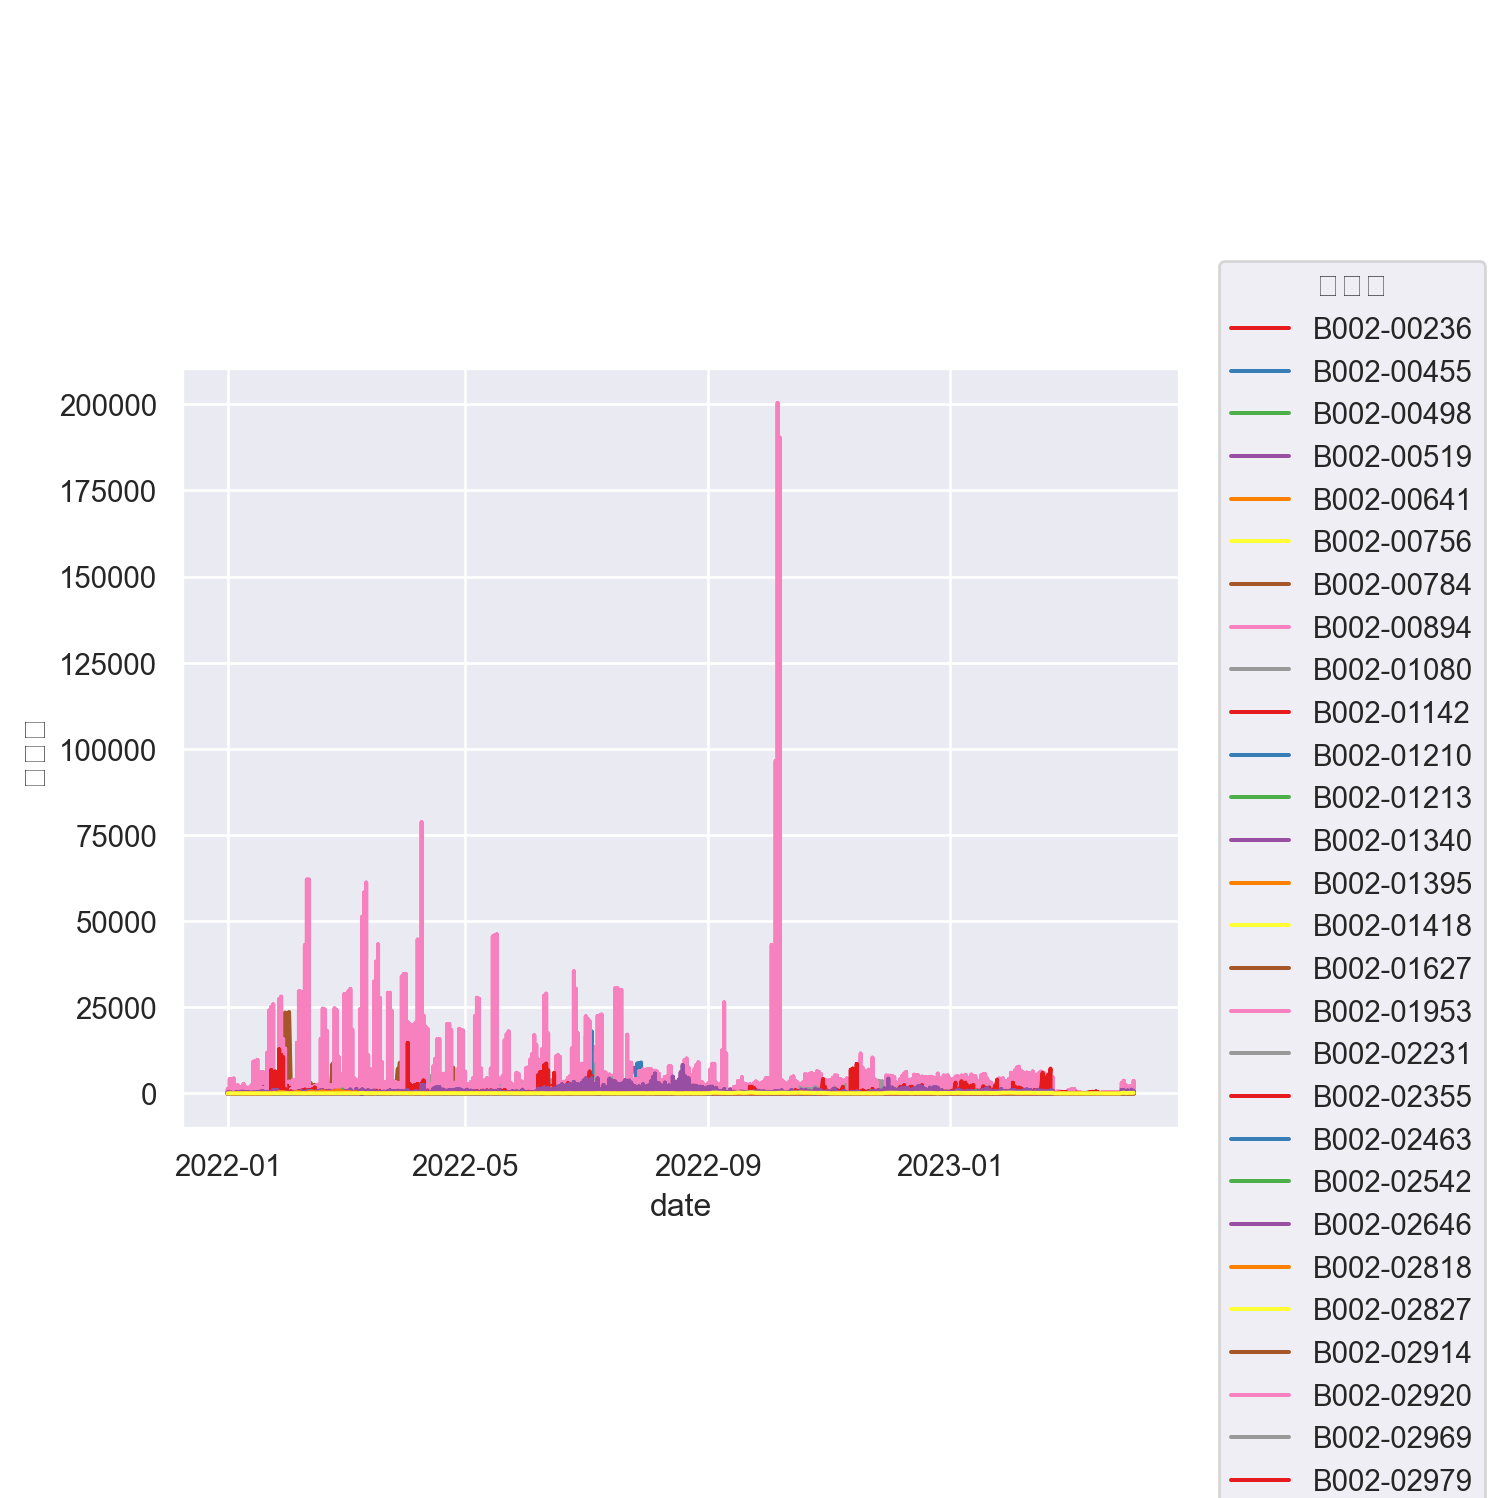

In [60]:
(
    so.Plot(train_brand,x='date',y='판매량',color='브랜드')
    .add(so.Line())
    .scale(color='Set1')
)

In [61]:
train_brand.query('판매량 > 100000')

제품             대분류             중분류             소분류  \
5662043  B002-02920-00004  B002-C001-0002  B002-C002-0005  B002-C003-0041   
5662044  B002-02920-00004  B002-C001-0002  B002-C002-0005  B002-C003-0041   
5662502  B002-02920-00005  B002-C001-0002  B002-C002-0005  B002-C003-0041   
5662503  B002-02920-00005  B002-C001-0002  B002-C002-0005  B002-C003-0041   

                브랜드       date     판매량  
5662043  B002-02920 2022-10-06  173450  
5662044  B002-02920 2022-10-07  164920  
5662502  B002-02920 2022-10-06  200420  
5662503  B002-02920 2022-10-07  190398

### => B002-02920 브랜드의 B002-02920-00004,B002-02920-00005 제품임.

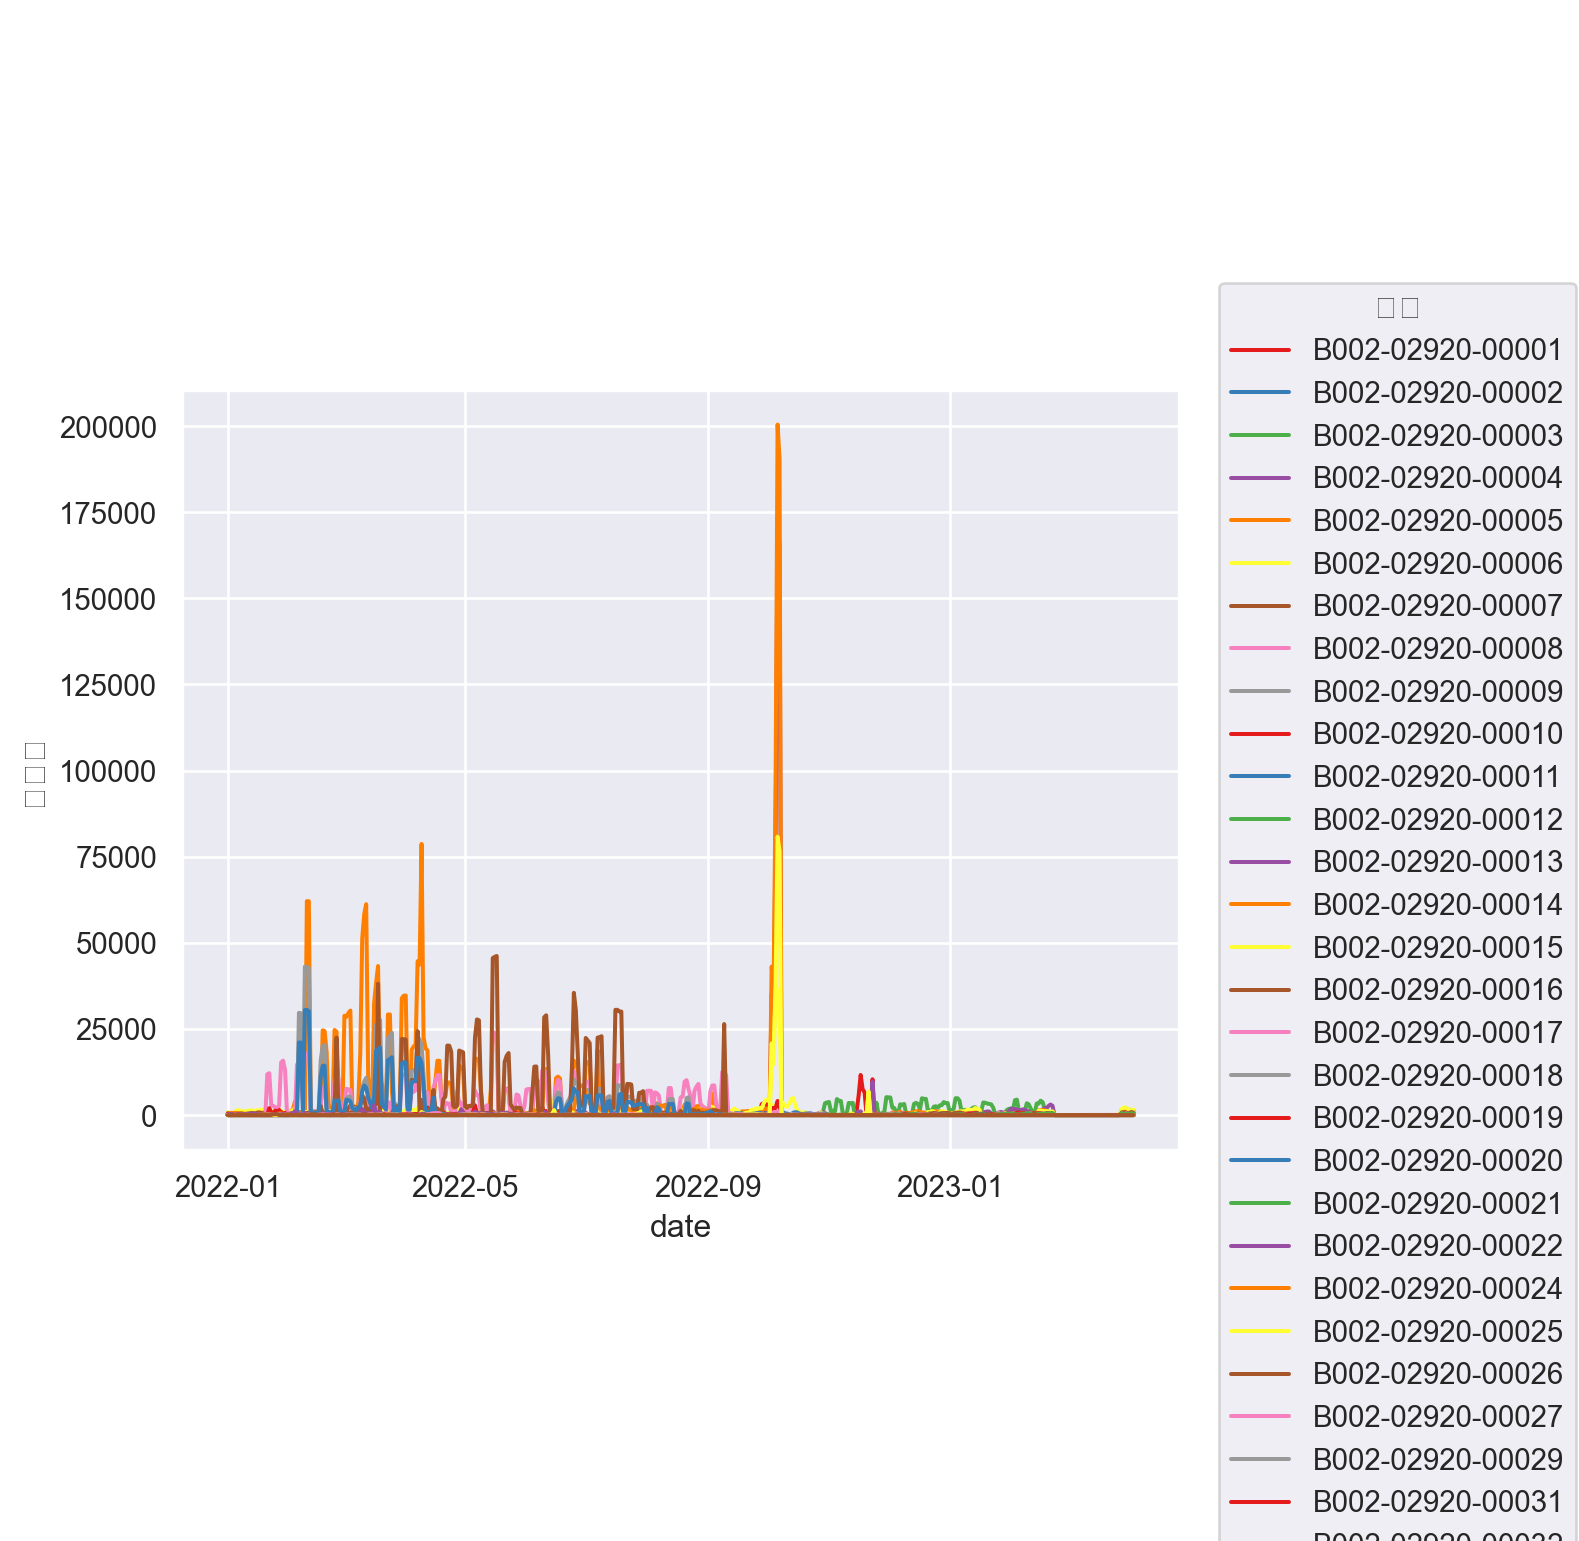

In [62]:
(
    so.Plot(train_brand.query('브랜드 == "B002-02920"'),x='date',y='판매량',color='제품')
    .add(so.Line())
    .scale(color='Set1')
)

 B002-02920 브랜드의 제품 찾기.

In [63]:
new_df=product_info.merge(train_long)
new_df.head(3)

제품                                               제품특성     ID  \
0  B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...  14794   
1  B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...  14794   
2  B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...  14794   

              대분류             중분류             소분류         브랜드       date  판매량  \
0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03509 2022-01-01   10   
1  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03509 2022-01-02   14   
2  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03509 2022-01-03   10   

   year  day  Day wday month holiday  
0  2022    1    1  Sat   Jan     Yes  
1  2022    2    2  Sun   Jan      No  
2  2022    3    3  Mon   Jan      No

In [64]:
train_brand=new_df.groupby(['제품','대분류','중분류','소분류','브랜드','date'])['판매량'].sum().reset_index(name='판매량')
train_brand=new_df.query('대분류 == "B002-C001-0002" and 중분류 == "B002-C002-0005" and 소분류 == "B002-C003-0041"')
train_brand.query('판매량 >100000')

제품                                               제품특성  \
2116727  B002-02920-00004  성별:남녀공용 몸무게(키즈):17kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   
2116728  B002-02920-00004  성별:남녀공용 몸무게(키즈):17kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   

            ID             대분류             중분류             소분류         브랜드  \
2116727  12335  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02920   
2116728  12335  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02920   

              date     판매량  year  day  Day wday month holiday  
2116727 2022-10-06  173450  2022  279    6  Thu   Oct      No  
2116728 2022-10-07  164920  2022  280    7  Fri   Oct      No

In [65]:
train_brand

제품                                               제품특성  \
2093040  B002-02355-00004  성별:남녀공용 몸무게(키즈):11kg 타입:팬티형 단계:3단계 사이즈:중형 기능:오...   
2093041  B002-02355-00004  성별:남녀공용 몸무게(키즈):11kg 타입:팬티형 단계:3단계 사이즈:중형 기능:오...   
2093042  B002-02355-00004  성별:남녀공용 몸무게(키즈):11kg 타입:팬티형 단계:3단계 사이즈:중형 기능:오...   
2093043  B002-02355-00004  성별:남녀공용 몸무게(키즈):11kg 타입:팬티형 단계:3단계 사이즈:중형 기능:오...   
2093044  B002-02355-00004  성별:남녀공용 몸무게(키즈):11kg 타입:팬티형 단계:3단계 사이즈:중형 기능:오...   
...                   ...                                                ...   
4807561  B002-02969-00040  성별:남녀선택 몸무게(키즈):18kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   
4807562  B002-02969-00040  성별:남녀선택 몸무게(키즈):18kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   
4807563  B002-02969-00040  성별:남녀선택 몸무게(키즈):18kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   
4807564  B002-02969-00040  성별:남녀선택 몸무게(키즈):18kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   
4807565  B002-02969-00040  성별:남녀선택 몸무게(키즈):18kg 타입:팬티형 단계:5단계 사이즈:특대형 기능:...   

            ID             대분류             중분류             소분류         브랜드  \
2093040   9988  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02355   
2093041   9988  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02355   
2093042   9988  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02355   
2093043   9988  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02355   
2093044   9988  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02355   
...        ...             ...             ...             ...         ...   
4807561  12578  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02969   
4807562  12578  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02969   
4807563  12578  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02969   
4807564  12578  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02969   
4807565  12578  B002-C001-0002  B002-C002-0005  B002-C003-0041  B002-02969   

              date  판매량  year  day  Day wday month holiday  
2093040 2022-01-01    0  2022    1    1  Sat   Jan     Yes  
2093041 2022-01-02    0  2022    2    2  Sun   Jan      No  
2093042 2022-01-03    0  2022    3    3  Mon   Jan      No  
2093043 2022-01-04    0  2022    4    4  Tue   Jan      No  
2093044 2022-01-05    0  2022    5    5  Wed   Jan      No  
...            ...  ...   ...  ...  ...  ...   ...     ...  
4807561 2023-03-31    0  2023   90   31  Fri   Mar      No  
4807562 2023-04-01    0  2023   91    1  Sat   Apr      No  
4807563 2023-04-02    0  2023   92    2  Sun   Apr      No  
4807564 2023-04-03    0  2023   93    3  Mon   Apr      No  
4807565 2023-04-04    0  2023   94    4  Tue   Apr      No  

[53244 rows x 15 columns]

In [74]:
train_sales.query('month == "Oct" and 제품 == "B002-02920-00004"')

ID                제품             대분류             중분류  \
4350305  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4366195  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4382085  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4397975  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4413865  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4429755  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4445645  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4461535  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4477425  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4493315  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4509205  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4525095  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4540985  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4556875  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4572765  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4588655  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4604545  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4620435  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4636325  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4652215  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4668105  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4683995  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4699885  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4715775  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4731665  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4747555  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4763445  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4779335  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4795225  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4811115  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4827005  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   

                    소분류         브랜드       date     판매량  year  day  Day wday  \
4350305  B002-C003-0041  B002-02920 2022-10-01    1036  2022  274    1  Sat   
4366195  B002-C003-0041  B002-02920 2022-10-02     390  2022  275    2  Sun   
4382085  B002-C003-0041  B002-02920 2022-10-03   34956  2022  276    3  Mon   
4397975  B002-C003-0041  B002-02920 2022-10-04   30126  2022  277    4  Tue   
4413865  B002-C003-0041  B002-02920 2022-10-05   80026  2022  278    5  Wed   
4429755  B002-C003-0041  B002-02920 2022-10-06  173450  2022  279    6  Thu   
4445645  B002-C003-0041  B002-02920 2022-10-07  164920  2022  280    7  Fri   
4461535  B002-C003-0041  B002-02920 2022-10-08     268  2022  281    8  Sat   
4477425  B002-C003-0041  B002-02920 2022-10-09     138  2022  282    9  Sun   
4493315  B002-C003-0041  B002-02920 2022-10-10     138  2022  283   10  Mon   
4509205  B002-C003-0041  B002-02920 2022-10-11     302  2022  284   11  Tue   
4525095  B002-C003-0041  B002-02920 2022-10-12      92  2022  285   12  Wed   
4540985  B002-C003-0041  B002-02920 2022-10-13     302  2022  286   13  Thu   
4556875  B002-C003-0041  B002-02920 2022-10-14     302  2022  287   14  Fri   
4572765  B002-C003-0041  B002-02920 2022-10-15     558  2022  288   15  Sat   
4588655  B002-C003-0041  B002-02920 2022-10-16     348  2022  289   16  Sun   
4604545  B002-C003-0041  B002-02920 2022-10-17       0  2022  290   17  Mon   
4620435  B002-C003-0041  B002-02920 2022-10-18      46  2022  291   18  Tue   
4636325  B002-C003-0041  B002-02920 2022-10-19     210  2022  292   19  Wed   
4652215  B002-C003-0041  B002-02920 2022-10-20     348  2022  293   20  Thu   
4668105  B002-C003-0041  B002-02920 2022-10-21     394  2022  294   21  Fri   
4683995  B002-C003-0041  B002-02920 2022-10-22     394  2022  295   22  Sat   
4699885  B002-C003

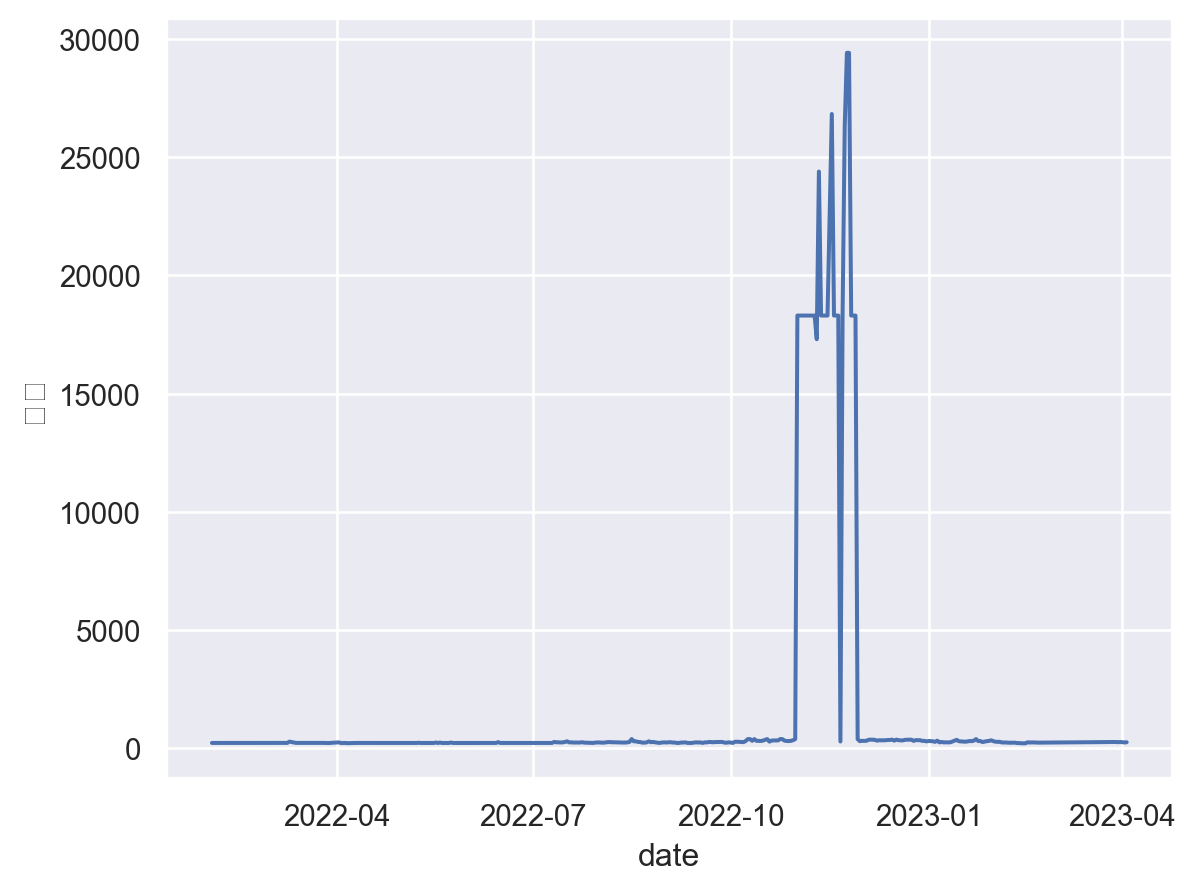

In [72]:
(
    so.Plot(train_sales.query('제품 == "B002-02920-00004"'),x='date',y='단가')
    .add(so.Line())
)

In [75]:
train_sales.groupby(['date','wday'])['단가'].mean()

date        wday
2022-01-01  Sat     16760.047277
2022-01-02  Sun     16888.045795
2022-01-03  Mon     17366.158798
2022-01-04  Tue     16934.089559
2022-01-05  Wed     16863.341627
                        ...     
2023-03-31  Fri     18268.433703
2023-04-01  Sat     18764.076544
2023-04-02  Sun     18593.531658
2023-04-03  Mon     18070.806487
2023-04-04  Tue     18328.166294
Name: 단가, Length: 459, dtype: float64

<Axes: xlabel='wday', ylabel='단가'>

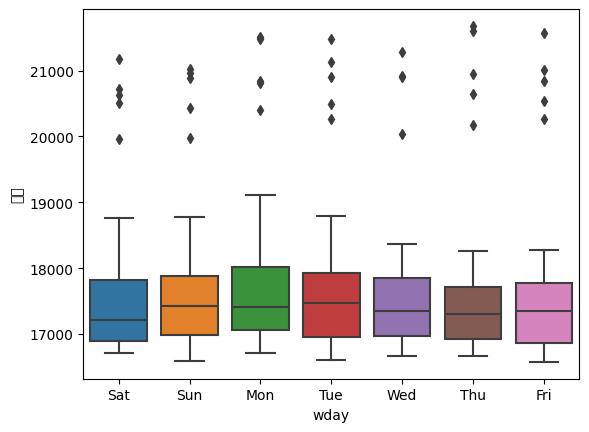

In [78]:
sns.boxplot(train_sales.groupby(['date','wday'])['단가'].mean().reset_index(),x='wday',y='단가')

<Axes: xlabel='Day', ylabel='단가'>

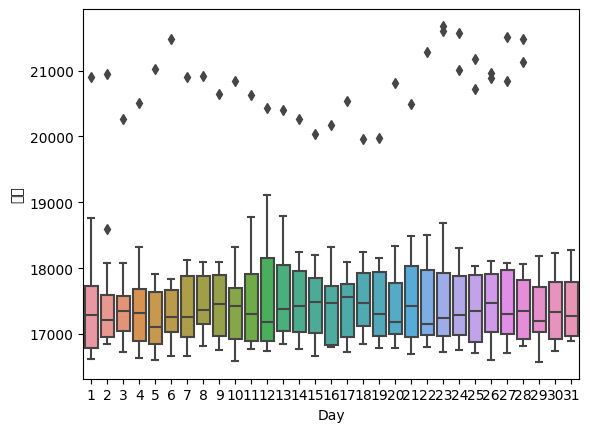

In [79]:
sns.boxplot(train_sales.groupby(['date','Day'])['단가'].mean().reset_index(),x='Day',y='단가')

<Axes: xlabel='month', ylabel='단가'>

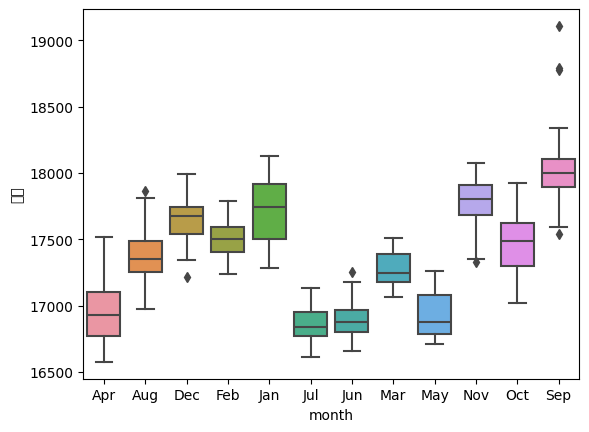

In [81]:
sns.boxplot(train_sales.groupby(['month','Day'])['단가'].mean().reset_index(),x='month',y='단가')

<Axes: xlabel='holiday', ylabel='단가'>

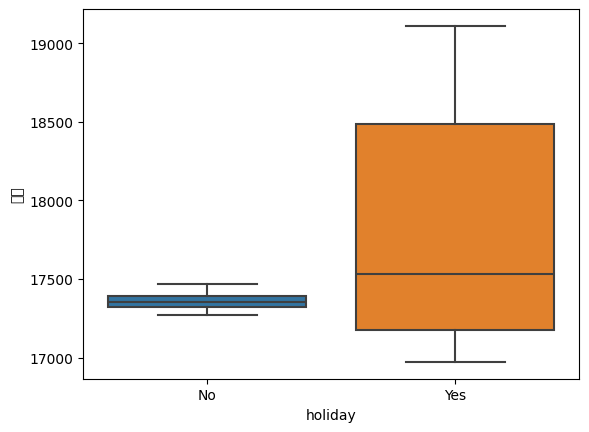

In [80]:
sns.boxplot(train_sales.groupby(['holiday','Day'])['단가'].mean().reset_index(),x='holiday',y='단가')

#### => 인터넷에서 찾아보니 위의 제품특성을 가진 제품은 팸퍼스 기저귀로 생각됨. 10월6일, 7일에 판매량 급증에 대해서 찾아봤지만 어떠한 내용도 찾지 못했음. 아마 큰 할인 으로 인한 판매량 상승을 예상해 볼 수 있음.

brand 언급량 transpose

In [ ]:
brand_long=brand.melt(
    id_vars='브랜드',
    var_name='date',
    value_name='언급량'
)
brand_long.head(3)

train_long.merge(brand_long,on='브랜드',how='left')

In [ ]:
train_long=train_long.assign(
    언급량 = brand_long['언급량']
)
train_long.head(3)

In [ ]:
brand_all=train_long.groupby('date')['언급량'].sum().reset_index()

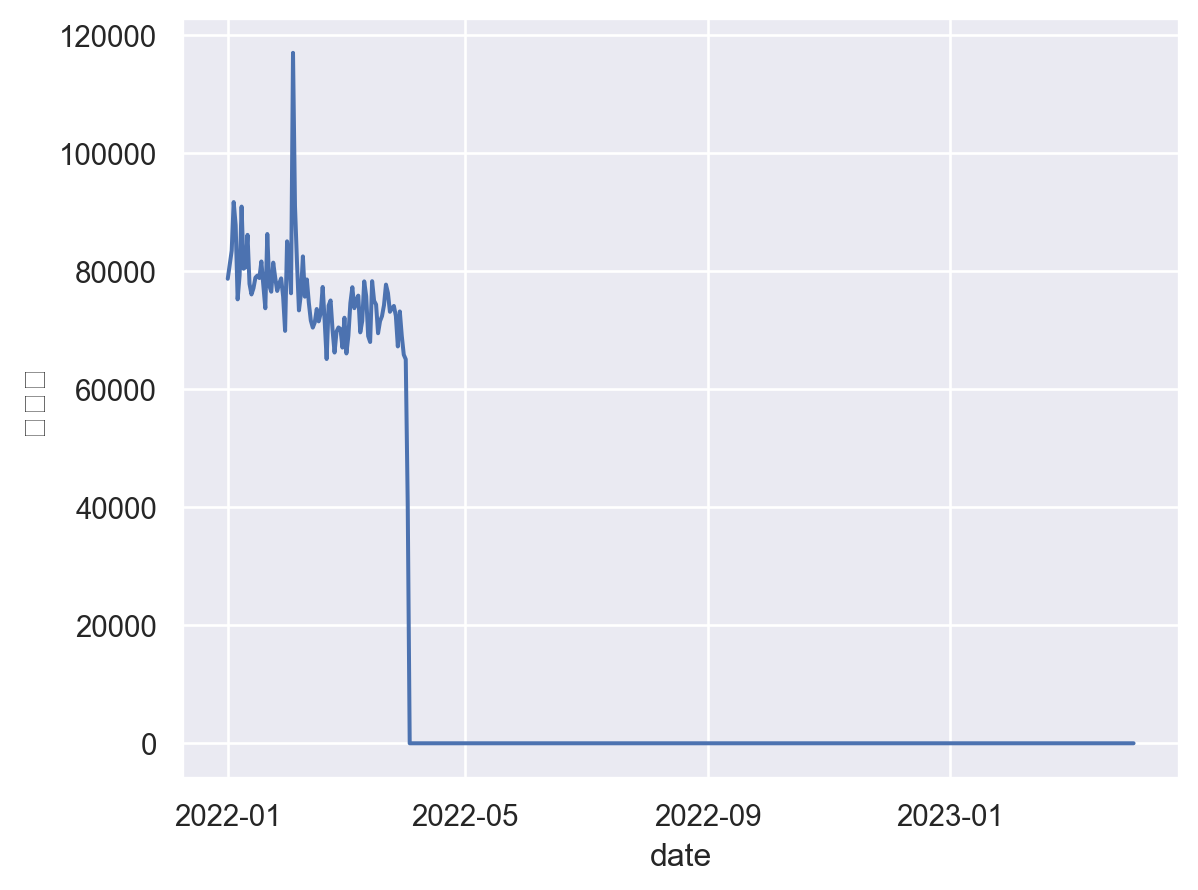

In [47]:
(
    so.Plot(brand_all,x='date',y='언급량')
    .add(so.Line())
)

### 연도별 비교 (2022, 2023)

In [48]:
train_year=train_long.groupby(['day','year'])['판매량'].sum().reset_index()
train_year=train_year.query('day <= 94')

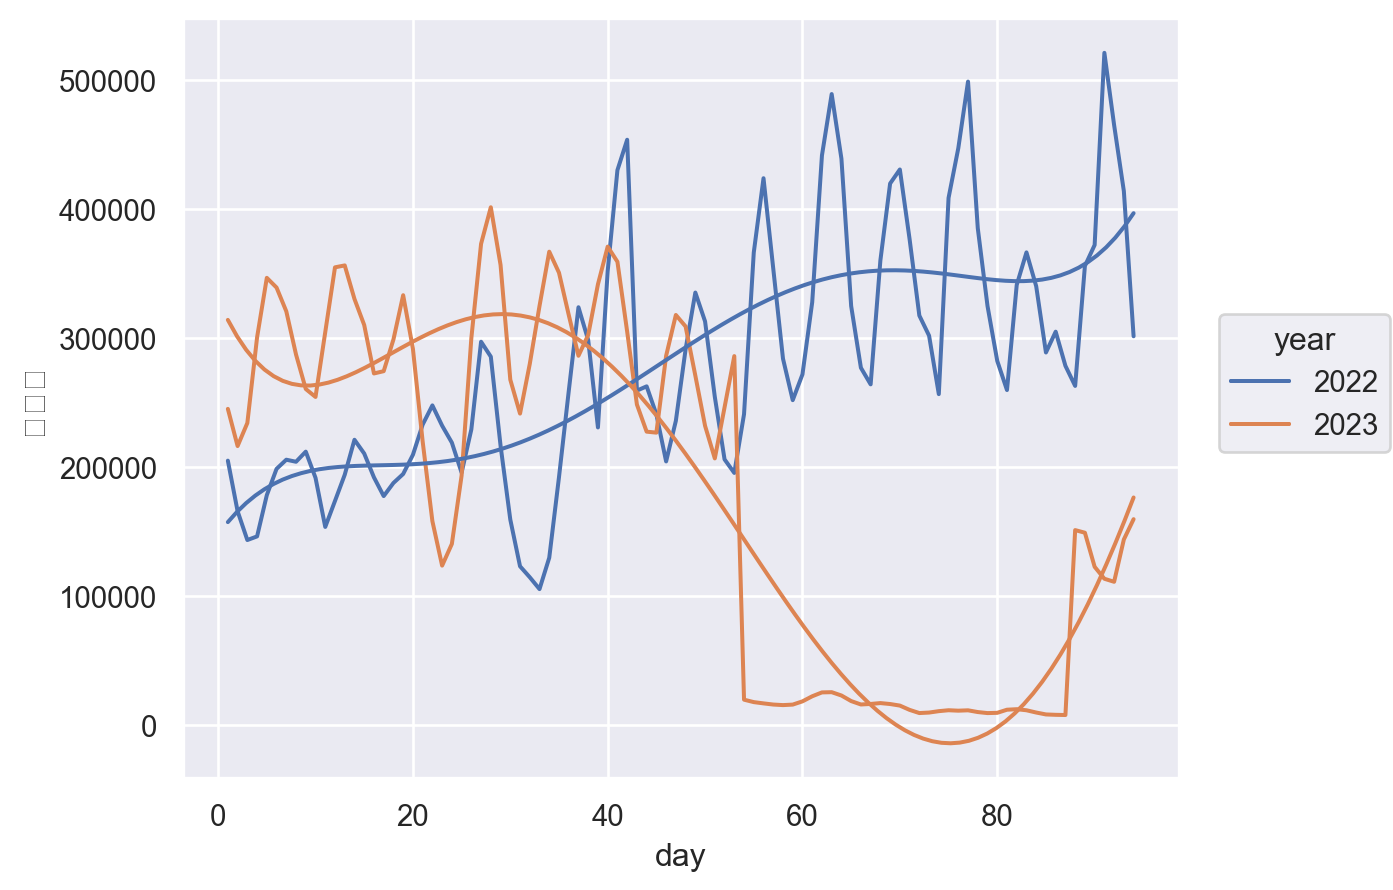

In [49]:
(
    so.Plot(train_year,x='day',y='판매량',color='year')
    .add(so.Line())
    .add(so.Line(),so.PolyFit(5))
)

요일별 판매량 비교

In [50]:
train_wday=train_long.groupby(['date','wday'])['판매량'].sum().reset_index()
train_wday

date wday     판매량
0   2022-01-01  Sat  204782
1   2022-01-02  Sun  165556
2   2022-01-03  Mon  143218
3   2022-01-04  Tue  146044
4   2022-01-05  Wed  178035
..         ...  ...     ...
454 2023-03-31  Fri  122453
455 2023-04-01  Sat  113185
456 2023-04-02  Sun  110840
457 2023-04-03  Mon  143651
458 2023-04-04  Tue  159393

[459 rows x 3 columns]

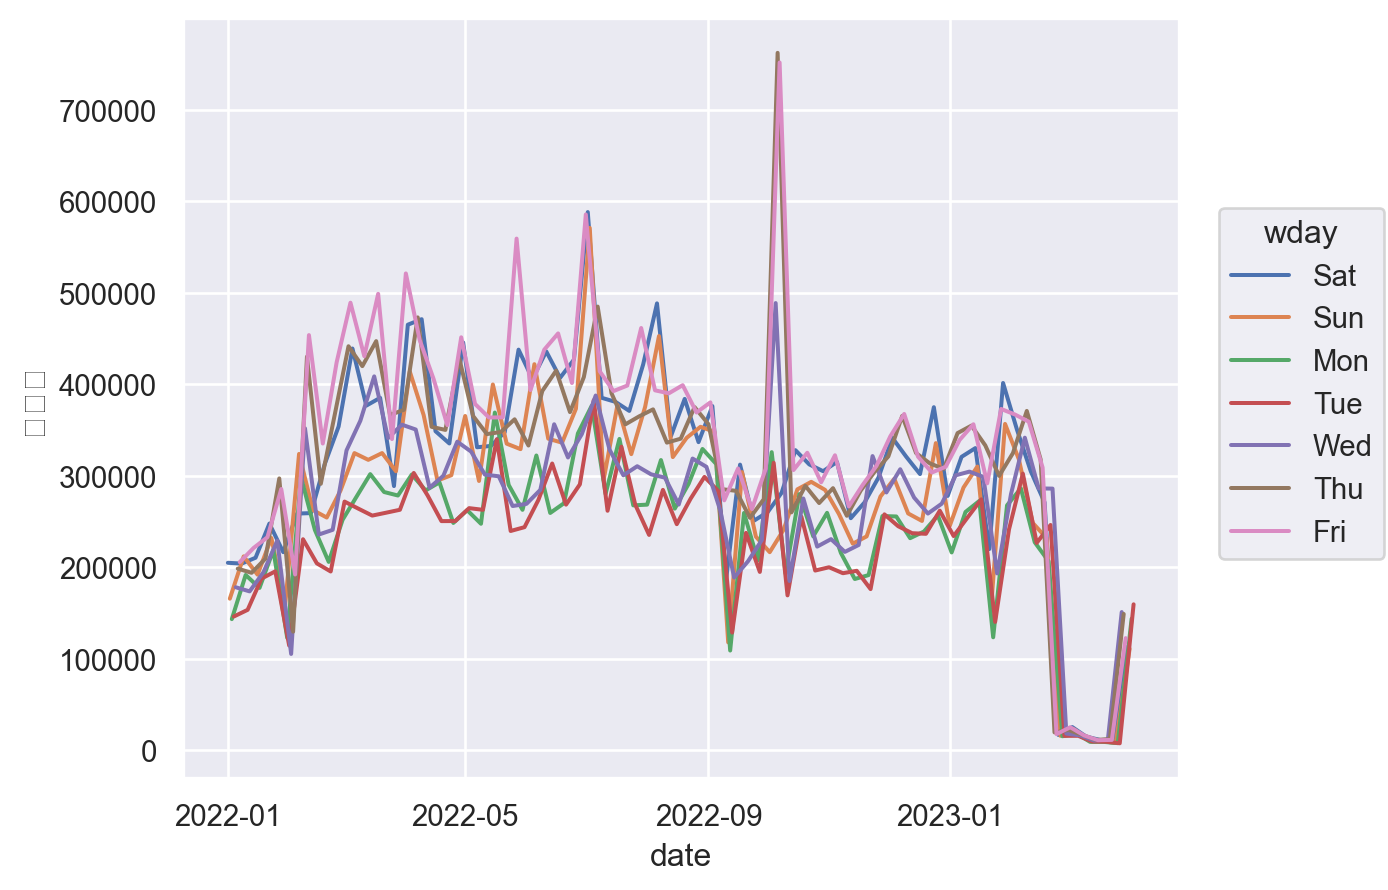

In [51]:
(
    so.Plot(train_wday,x='date',y='판매량',color='wday')
    .add(so.Line())
)

In [ ]:
sns.boxplot(train_wday,x='wday',y='판매량')

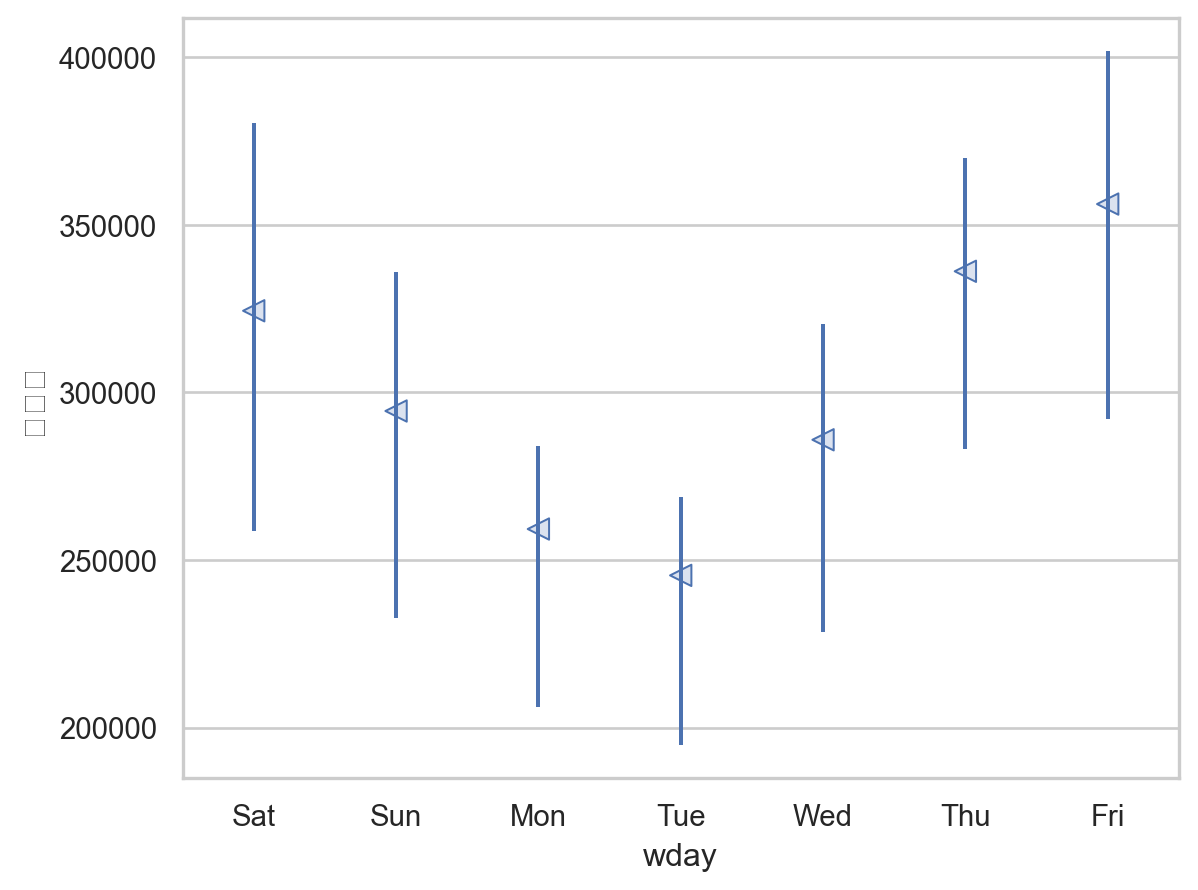

In [52]:
rangeplot(train_wday,x="wday",y="판매량",alpha=.5).share(y=False)

요일별로 판매량의 유의미한 판매량 차이가 보였음 (월, 화, 수가 낮은 모습)

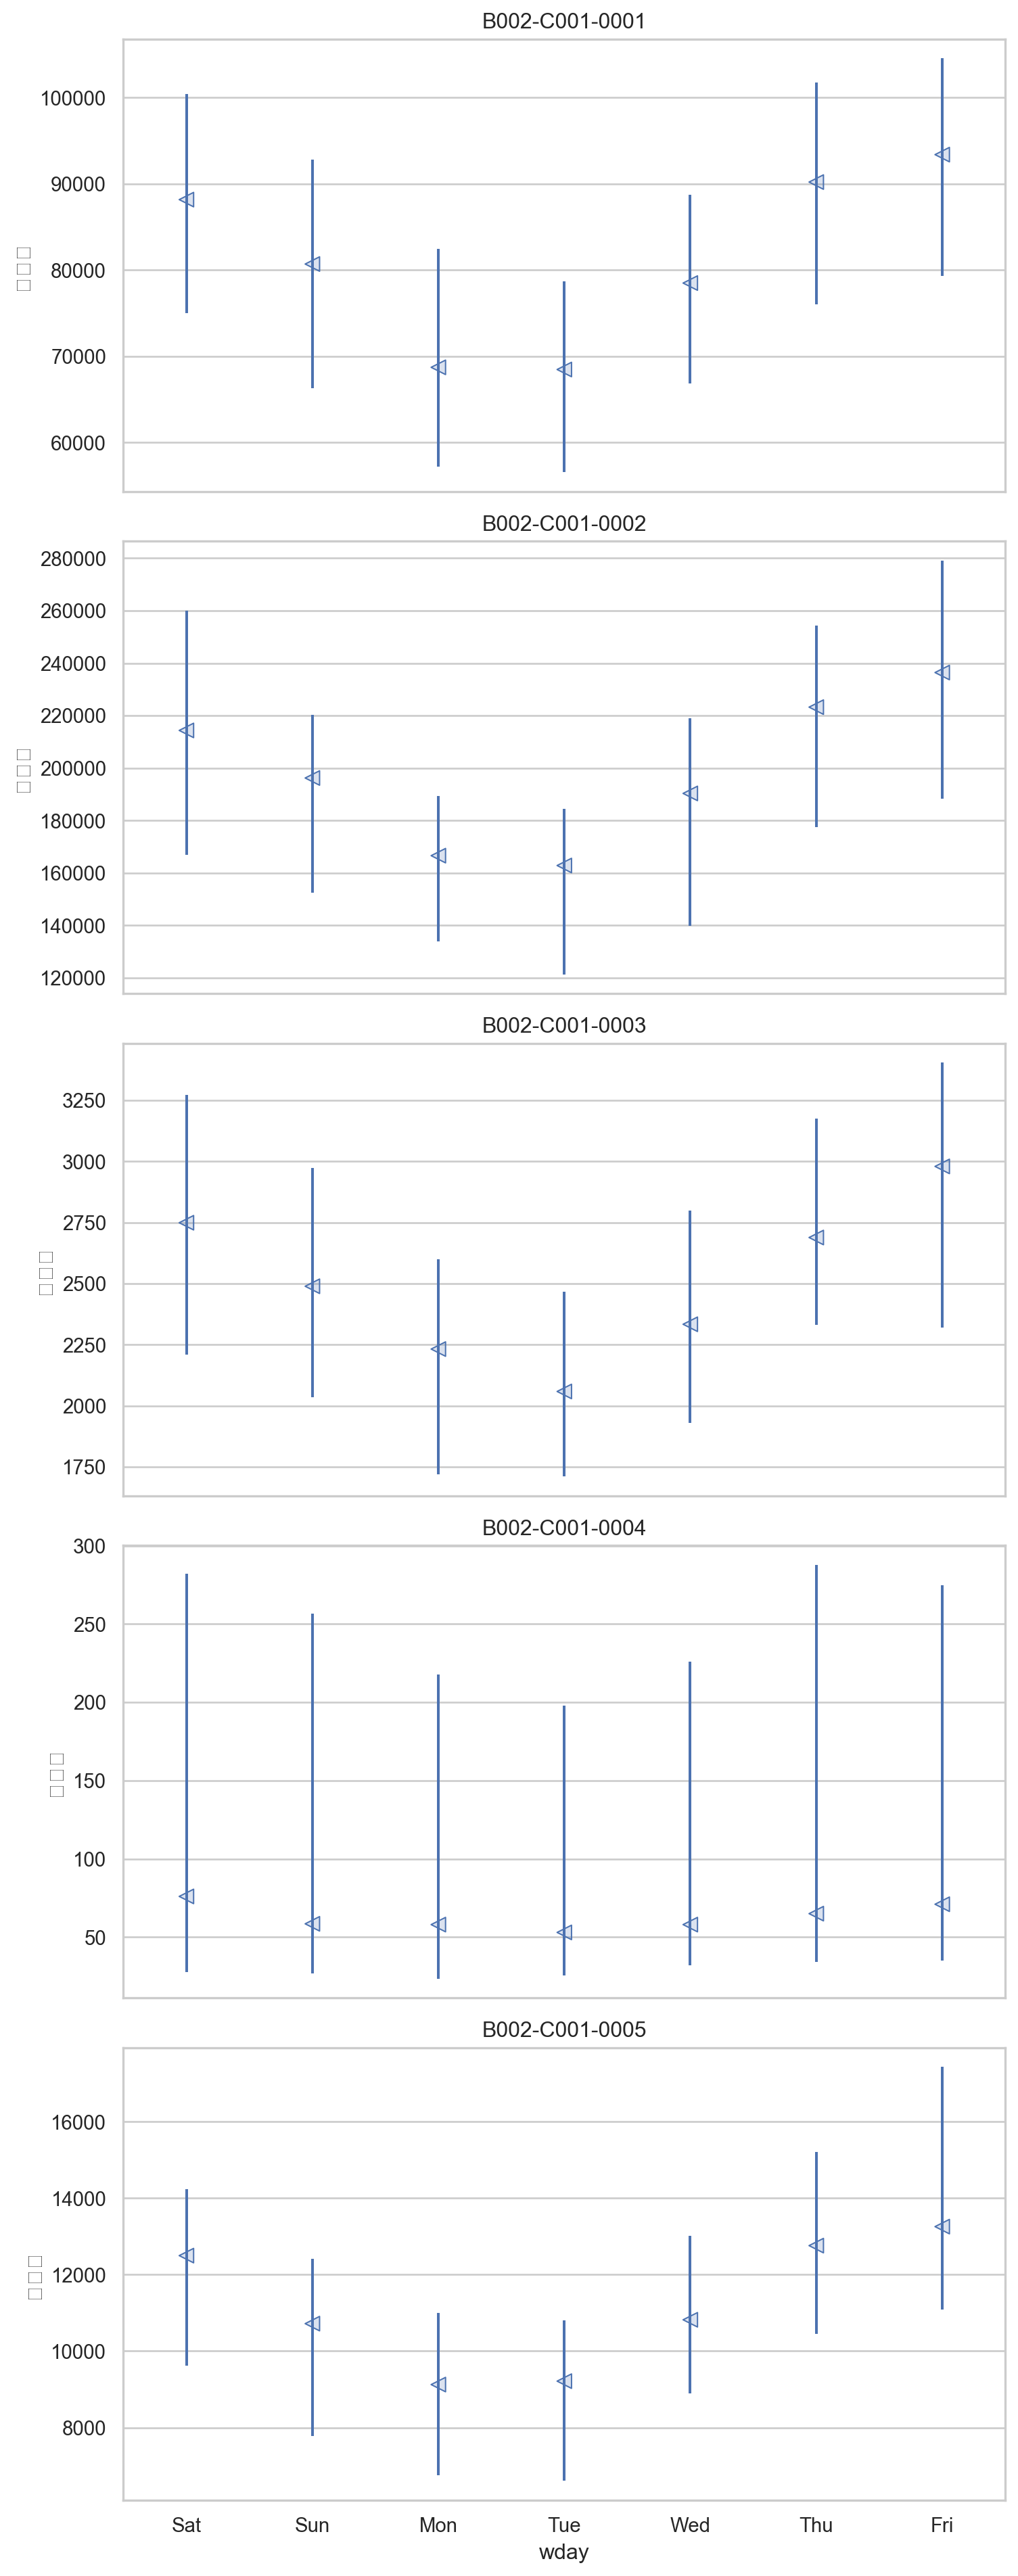

In [53]:
#대분류별 
train_big=train_long.groupby(['대분류','date','wday'])['판매량'].sum().reset_index(name='판매량')
train_big

rangeplot(train_big,x="wday",y="판매량",alpha=.5).facet(row='대분류').share(y=False).layout(size=(8,20))

월별 비교

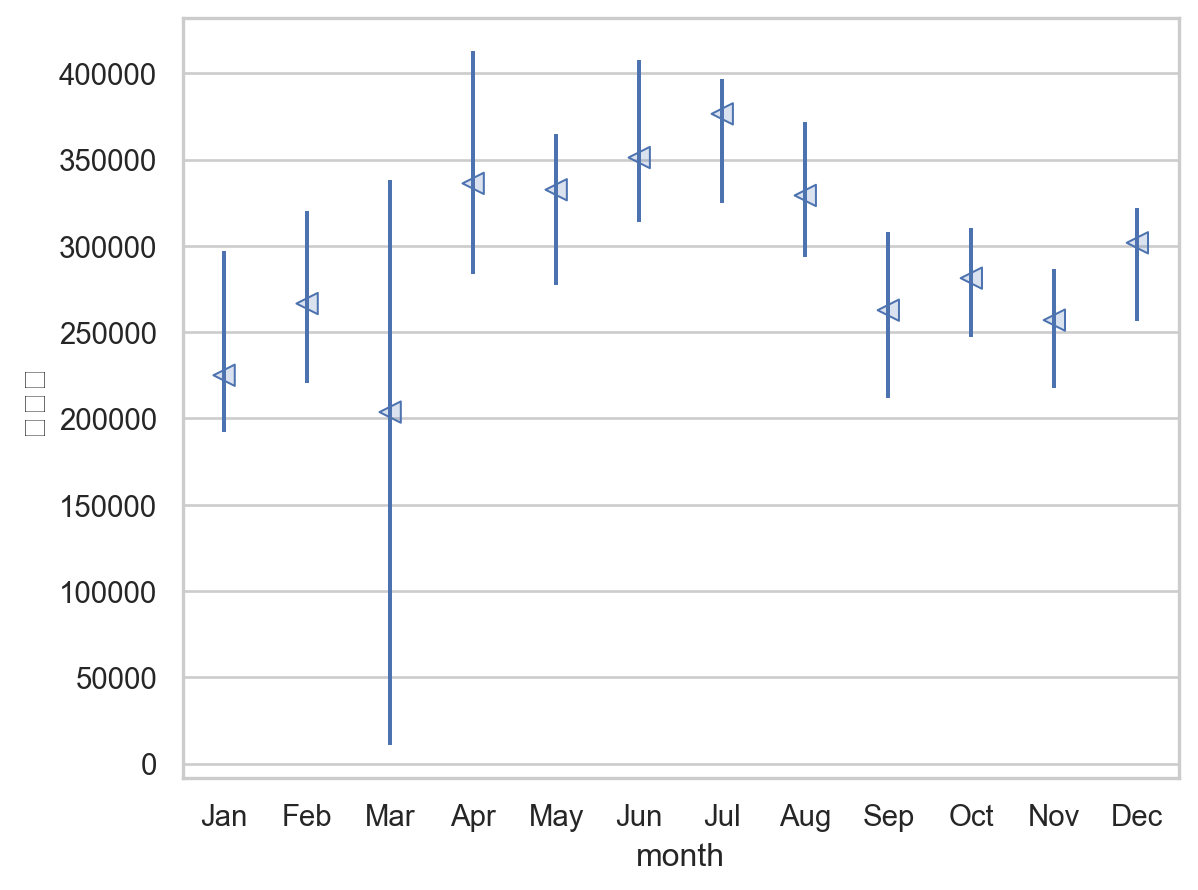

In [54]:
rangeplot(train_long.groupby(['date','month'])['판매량'].sum().reset_index(),x="month",y="판매량",alpha=.5).share(y=False)

<Axes: xlabel='month', ylabel='판매량'>

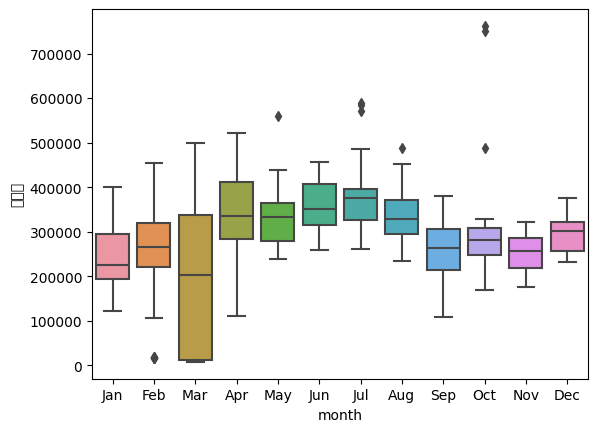

In [101]:
sns.boxplot(train_long.groupby(['date','month'])['판매량'].sum().reset_index(),x='month',y='판매량')

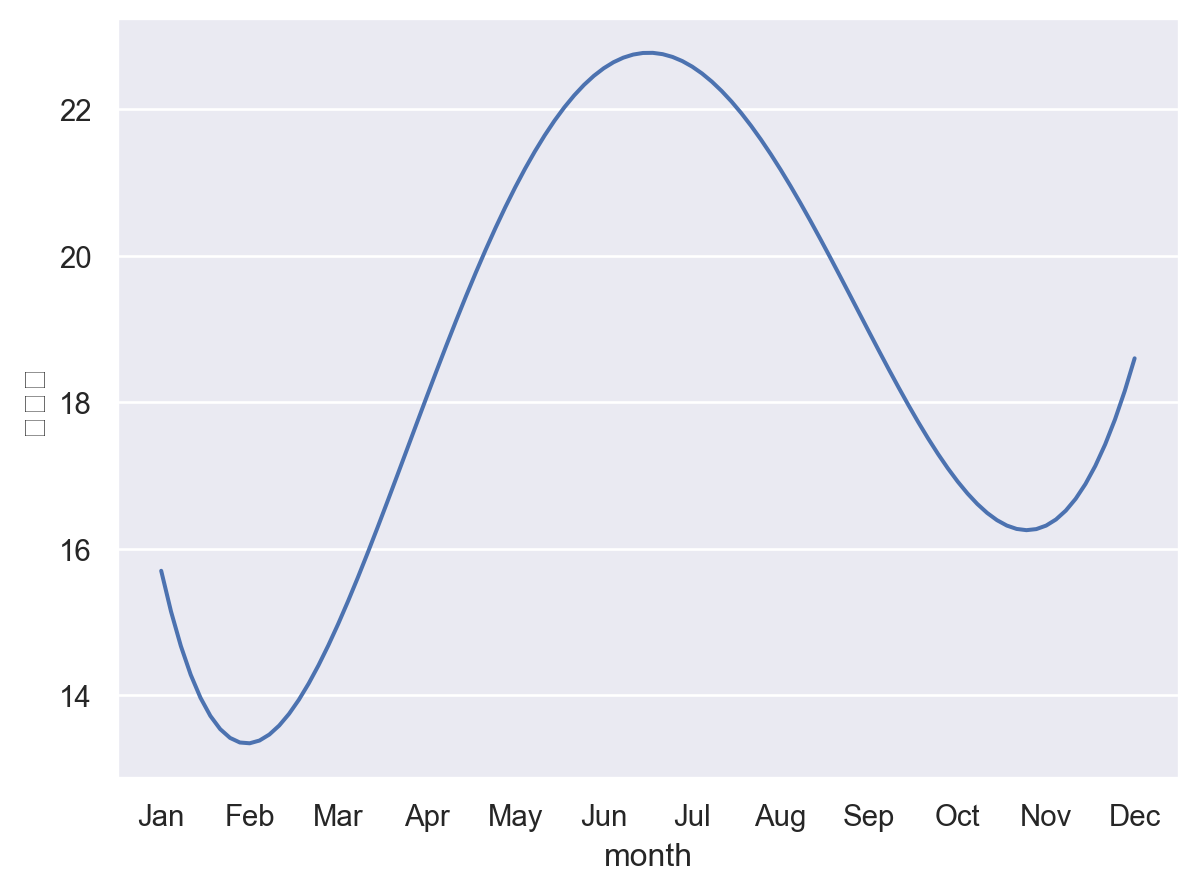

In [85]:
(
    so.Plot(train_long.groupby(['date','month'])['판매량'].mean().reset_index(),x='month',y='판매량')
    .add(so.Line(),so.PolyFit(5))
)

한달간의 추세(30일)

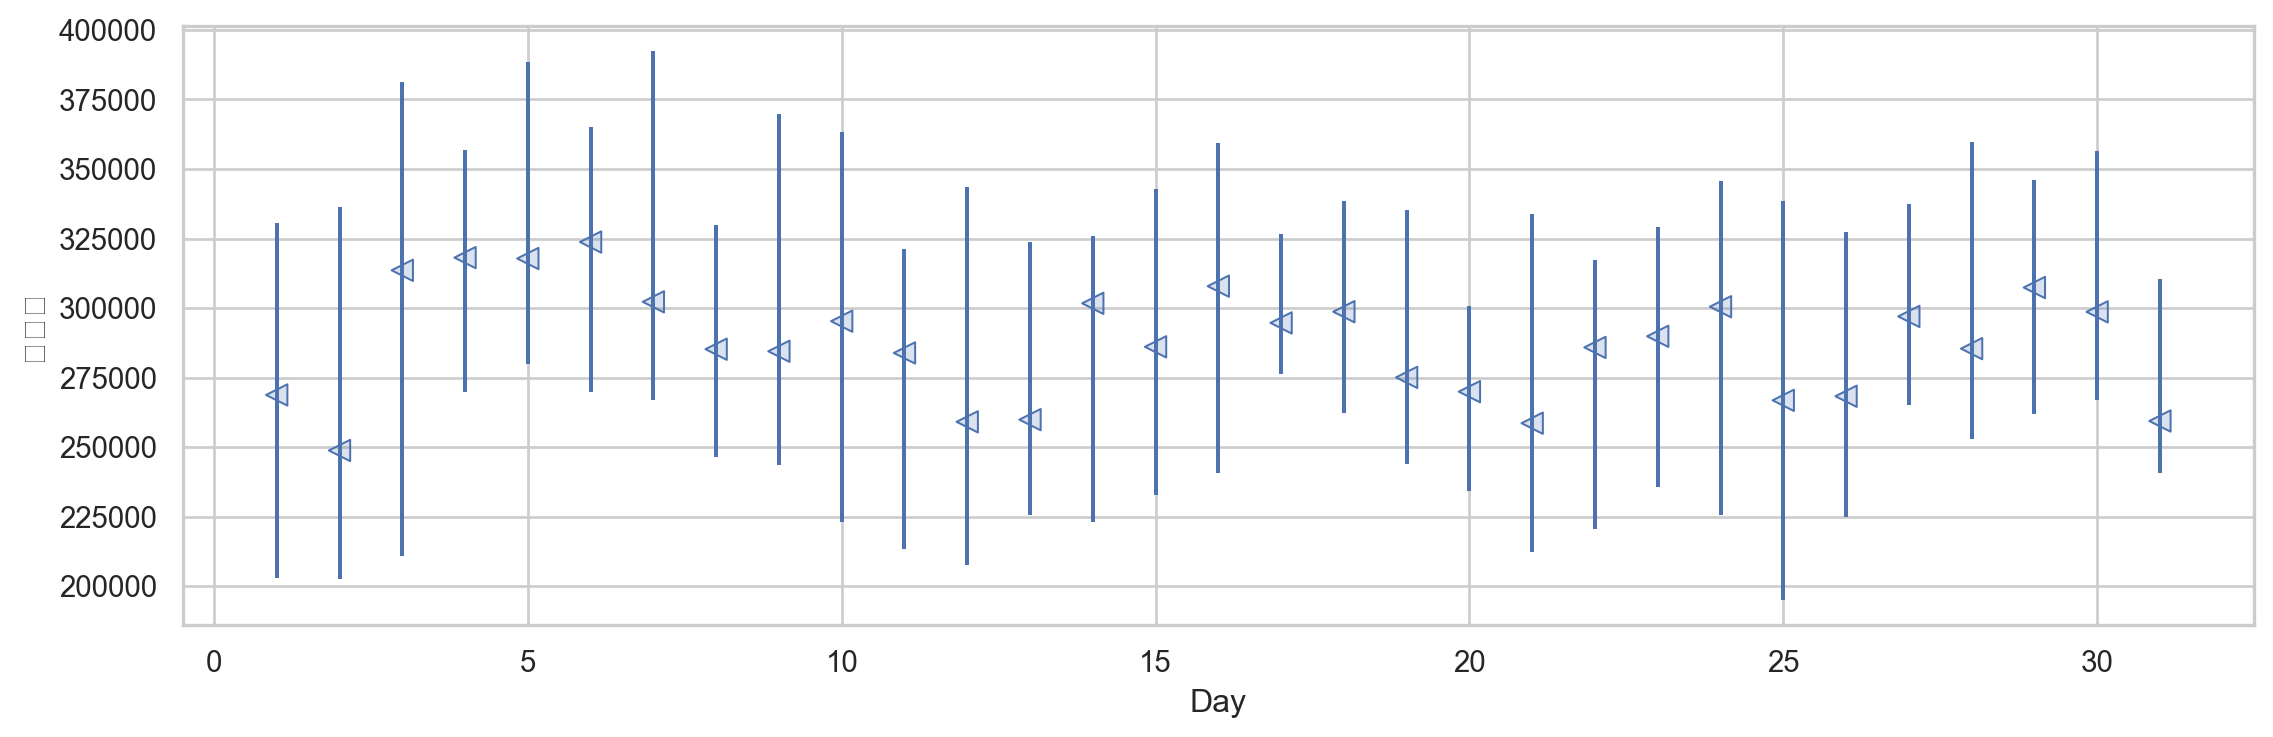

In [91]:
rangeplot(train_long.groupby(['date','Day'])['판매량'].sum().reset_index(),x="Day",y="판매량",alpha=.5).share(y=False).layout(size=(12,4))

<Axes: xlabel='Day', ylabel='판매량'>

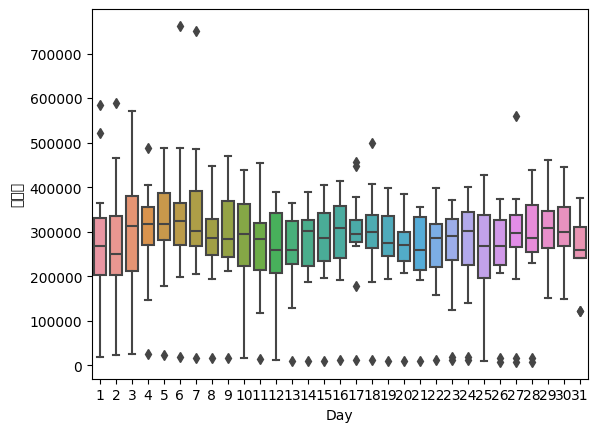

In [102]:
sns.boxplot(train_long.groupby(['date','Day'])['판매량'].sum().reset_index(),x='Day',y='판매량')

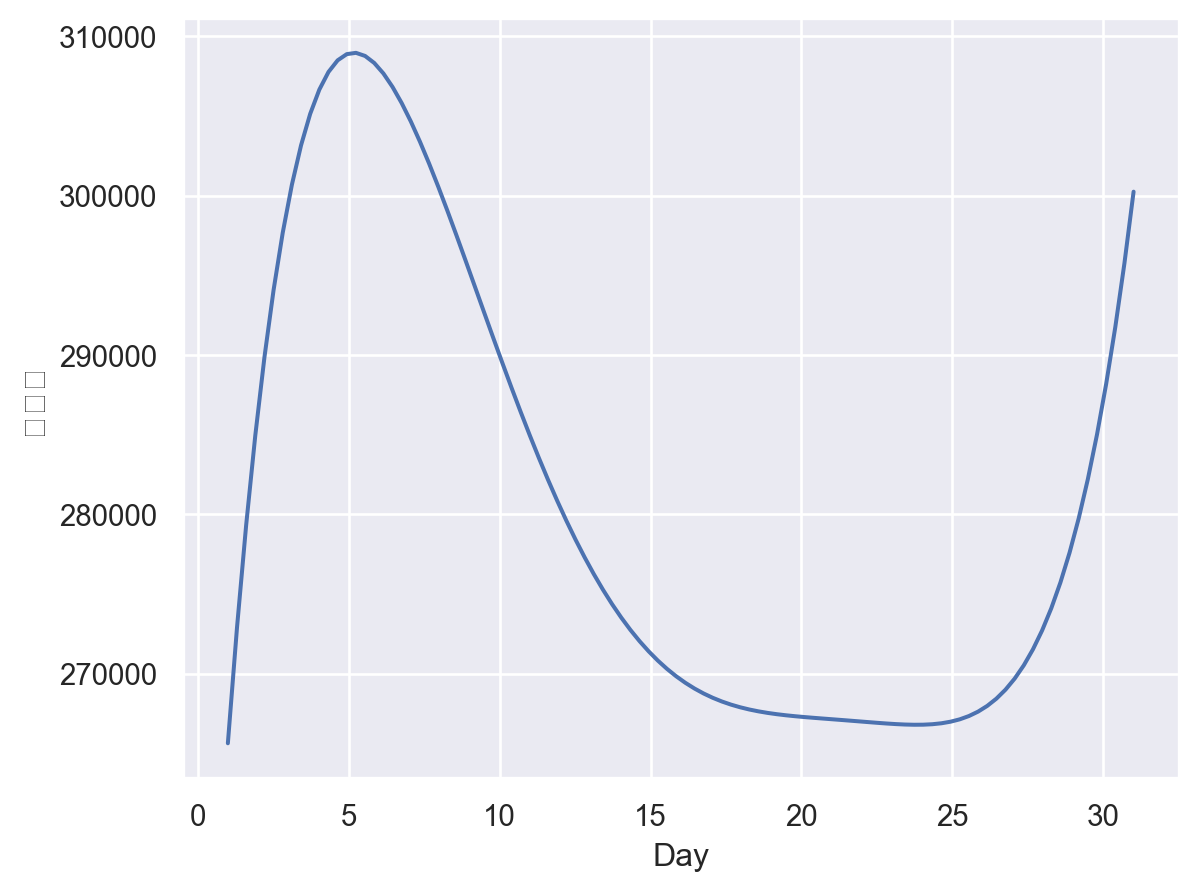

In [90]:
(
    so.Plot(train_long.groupby(['date','Day'])['판매량'].sum().reset_index(),x='Day',y='판매량')
    .add(so.Line(),so.PolyFit(5))
)

휴일별 비교 (holiday)

In [55]:
train_holiday=train_long.groupby(['date','holiday'])['판매량'].sum().reset_index()
train_holiday.head(3)

date holiday     판매량
0 2022-01-01     Yes  204782
1 2022-01-02      No  165556
2 2022-01-03      No  143218

In [56]:
train_long.groupby(['holiday'])['판매량'].mean().reset_index()

holiday       판매량
0      No  17.88890
1     Yes  13.46523

<Axes: xlabel='holiday', ylabel='판매량'>

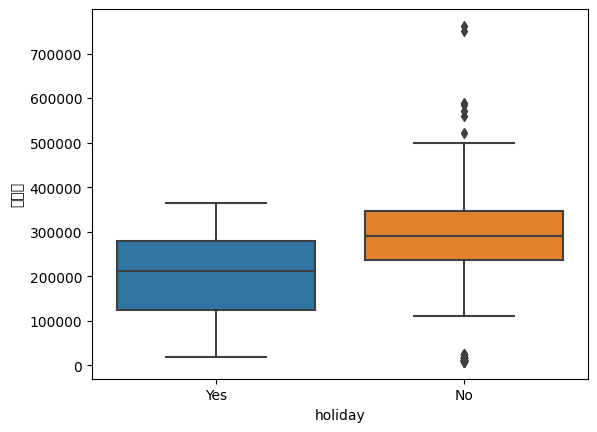

In [104]:
sns.boxplot(train_holiday,x='holiday',y='판매량')

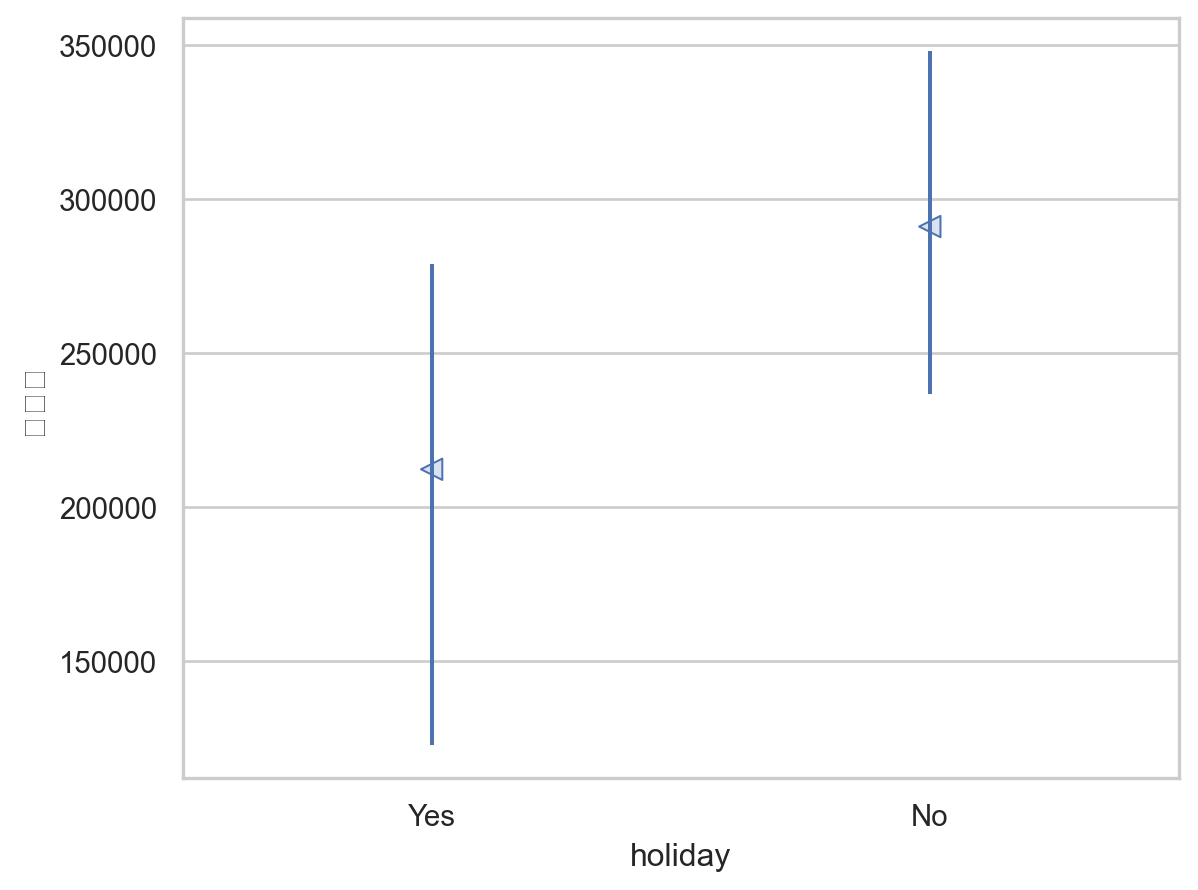

In [57]:
rangeplot(train_holiday,x="holiday",y="판매량",alpha=.5).share(y=False)

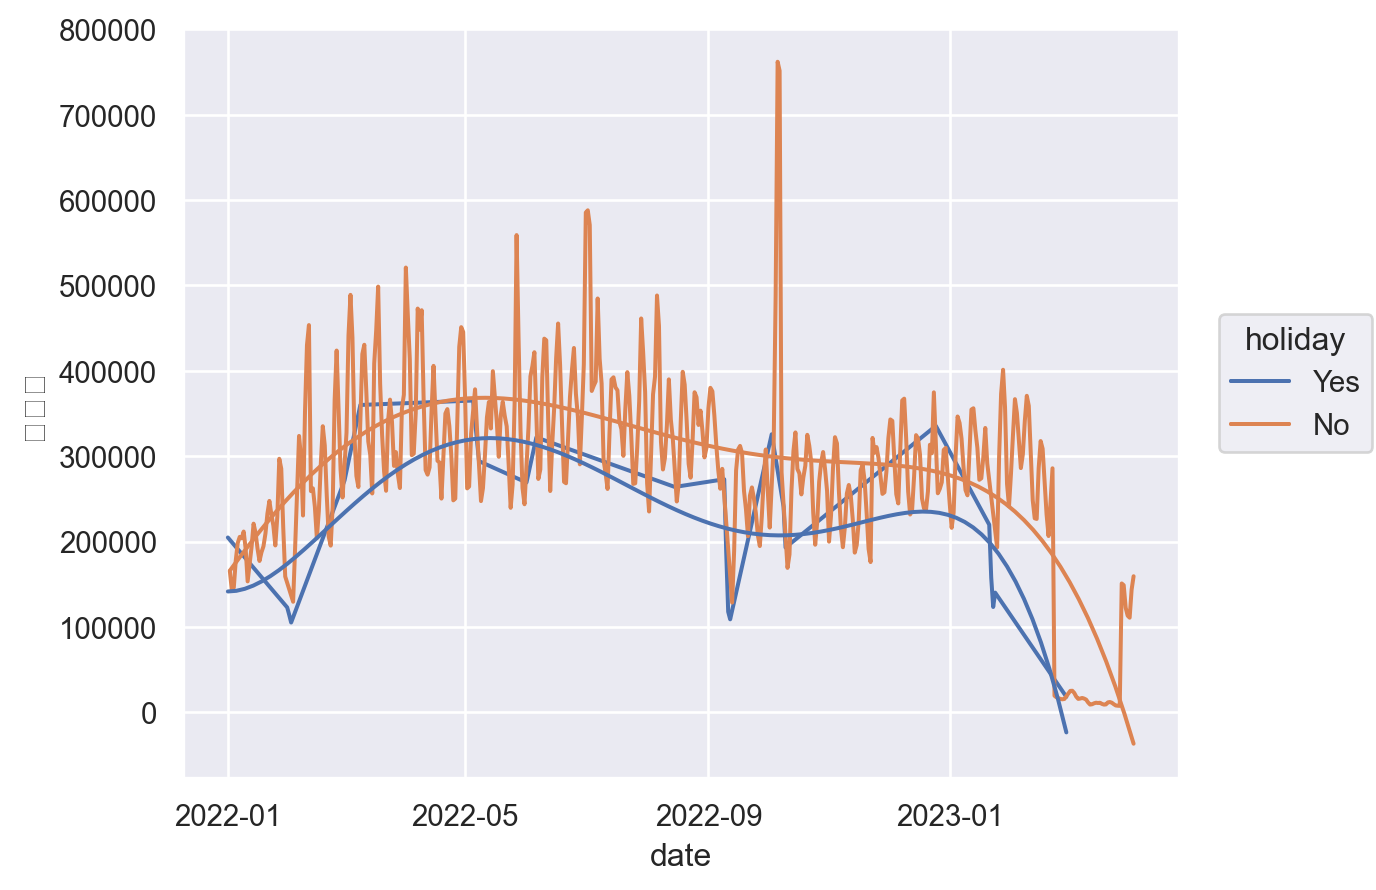

In [58]:
(
    so.Plot(train_holiday,x='date',y='판매량',color='holiday')
    .add(so.Line())
    .add(so.Line(),so.PolyFit(5))
)

In [59]:
train_long.groupby(['date','대분류','holiday'])['판매량'].sum().reset_index()

date             대분류 holiday     판매량
0    2022-01-01  B002-C001-0001     Yes   84536
1    2022-01-01  B002-C001-0002     Yes  113619
2    2022-01-01  B002-C001-0003     Yes      31
3    2022-01-01  B002-C001-0004     Yes       4
4    2022-01-01  B002-C001-0005     Yes    6592
...         ...             ...     ...     ...
2290 2023-04-04  B002-C001-0001      No   55732
2291 2023-04-04  B002-C001-0002      No   96875
2292 2023-04-04  B002-C001-0003      No    1957
2293 2023-04-04  B002-C001-0004      No     132
2294 2023-04-04  B002-C001-0005      No    4697

[2295 rows x 4 columns]

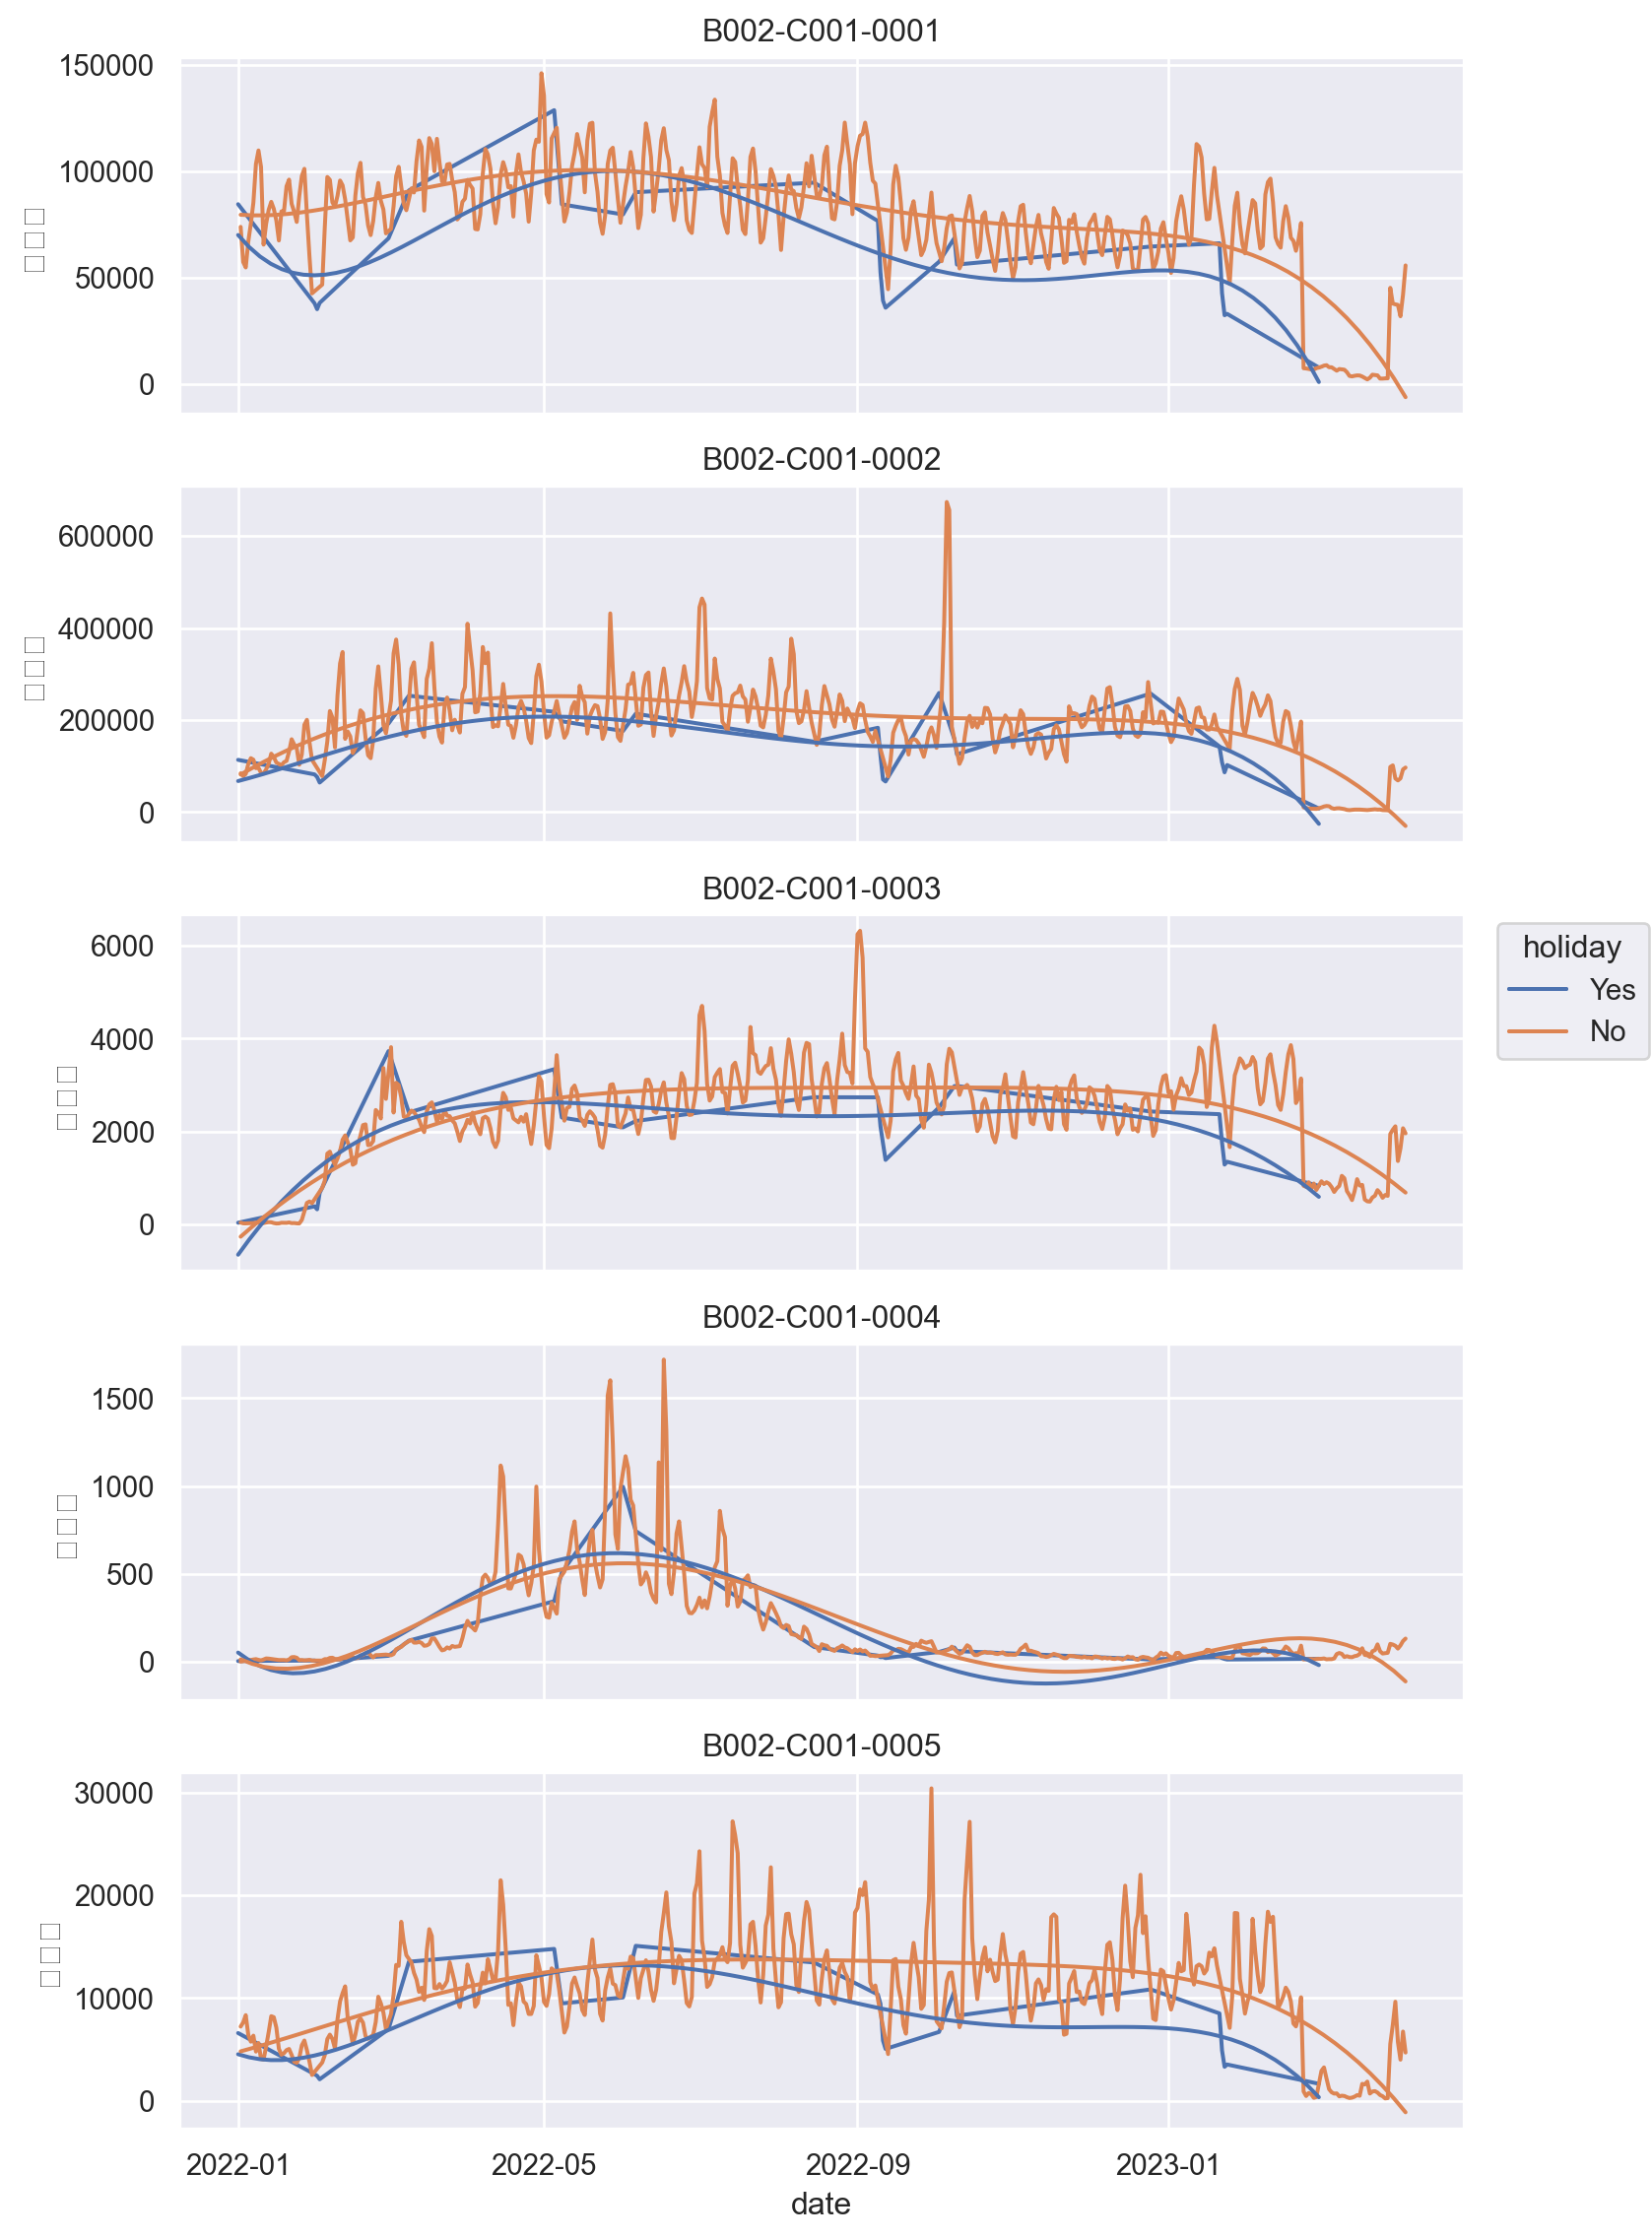

In [60]:
(
    so.Plot(train_long.groupby(['date','대분류','holiday'])['판매량'].sum().reset_index(),x='date',y='판매량',color='holiday')
    .add(so.Line())
    .facet('대분류',wrap=1)
    .add(so.Line(),so.PolyFit(5))
    .layout(size=(8,12))
    .share(y=False)
)

예상과 다르게 휴일일 경우 오히려 판매량이 낮은 모습임.

### 판매금액 데이터

In [66]:
sales_long=sales.melt(
    id_vars=['ID','제품','대분류','중분류','소분류','브랜드'],
    var_name='date',
    value_name='판매금액'
)
sales_long

ID                제품             대분류             중분류  \
0            0  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1            1  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2            2  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3            3  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4            4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
...        ...               ...             ...             ...   
7293505  15885  B002-03799-00002  B002-C001-0003  B002-C002-0008   
7293506  15886  B002-03799-00003  B002-C001-0003  B002-C002-0008   
7293507  15887  B002-03799-00004  B002-C001-0003  B002-C002-0008   
7293508  15888  B002-03799-00005  B002-C001-0003  B002-C002-0008   
7293509  15889  B002-03799-00010  B002-C001-0002  B002-C002-0004   

                    소분류         브랜드        date   판매금액  
0        B002-C003-0038  B002-00001  2022-01-01      0  
1        B002-C003-0044  B002-00002  2022-01-01      0  
2        B002-C003-0044  B002-00002  2022-01-01      0  
3        B002-C003-0044  B002-00002  2022-01-01      0  
4        B002-C003-0003  B002-00003  2022-01-01      0  
...                 ...         ...         ...    ...  
7293505  B002-C003-0042  B002-03799  2023-04-04      0  
7293506  B002-C003-0044  B002-03799  2023-04-04  60690  
7293507  B002-C003-0044  B002-03799  2023-04-04      0  
7293508  B002-C003-0044  B002-03799  2023-04-04  27300  
7293509  B002-C003-0020  B002-03799  2023-04-04      0  

[7293510 rows x 8 columns]

In [67]:
train_sales=train_long.assign(
    판매금액 = sales_long['판매금액'],
    단가 = lambda x: x['판매금액'] /x['판매량']
)
train_sales.head(3)

ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   

          브랜드       date  판매량  year  day  Day wday month holiday  판매금액  단가  
0  B002-00001 2022-01-01    0  2022    1    1  Sat   Jan     Yes     0 NaN  
1  B002-00002 2022-01-01    0  2022    1    1  Sat   Jan     Yes     0 NaN  
2  B002-00002 2022-01-01    0  2022    1    1  Sat   Jan     Yes     0 NaN

In [94]:
train_sales.dropna().groupby('대분류')['단가'].mean()

대분류
B002-C001-0001    30046.576003
B002-C001-0002    12574.564676
B002-C001-0003    25127.523719
B002-C001-0004    16368.012729
B002-C001-0005     3717.221808
Name: 단가, dtype: float64

In [64]:
train_sales.dropna().groupby('제품')['단가'].mean()

제품
B002-00001-00001    11176.923077
B002-00002-00001    26653.846154
B002-00002-00002    12900.000000
B002-00002-00003     4000.000000
B002-00003-00001     4799.227136
                        ...     
B002-03798-00046    15526.000000
B002-03799-00002     1800.000000
B002-03799-00004    10960.507728
B002-03799-00005    14900.000000
B002-03799-00010    49800.000000
Name: 단가, Length: 10707, dtype: float64

In [65]:
train_sales.query('제품 == "B002-00001-00001" and 단가 > 0')

ID                제품             대분류             중분류             소분류  \
619710    0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
635600    0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
651490    0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
683270    0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
699160    0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
...      ..               ...             ...             ...             ...   
6371890   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
6387780   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
6403670   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
6419560   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
6435450   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   

                브랜드       date  판매량  year  day wday month holiday       언급량  \
619710   B002-00001 2022-02-09    1  2022   40  Wed   Feb      No  0.072520   
635600   B002-00001 2022-02-10    1  2022   41  Thu   Feb      No  0.000000   
651490   B002-00001 2022-02-11    1  2022   42  Fri   Feb      No  0.304610   
683270   B002-00001 2022-02-13    1  2022   44  Sun   Feb      No  7.151140   
699160   B002-00001 2022-02-14    1  2022   45  Mon   Feb      No  7.412291   
...             ...        ...  ...   ...  ...  ...   ...     ...       ...   
6371890  B002-00001 2023-02-06    6  2023   37  Mon   Feb      No       NaN   
6387780  B002-00001 2023-02-07    6  2023   38  Tue   Feb      No       NaN   
6403670  B002-00001 2023-02-08   11  2023   39  Wed   Feb      No       NaN   
6419560  B002-00001 2023-02-09    2  2023   40  Thu   Feb      No       NaN   
6435450  B002-00001 2023-02-10   12  2023   41  Fri   Feb      No       NaN   

          판매금액       단가  
619710   13500  13500.0  
635600   13500  13500.0  
651490   13500  13500.0  
683270   13500  13500.0  
699160   13500  13500.0  
...        ...      ...  
6371890  33600   5600.0  
6387780  33600   5600.0  
6403670  61600   5600.0  
6419560  11200   5600.0  
6435450  67200   5600.0  

[116 rows x 16 columns]

In [66]:
train_sales.query('제품 == "B002-02920-00004" and 단가 > 0')

ID                제품             대분류             중분류  \
520815   12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
536705   12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
552595   12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
886285   12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
902175   12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
...        ...               ...             ...             ...   
7210505  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
7226395  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
7242285  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
7258175  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
7274065  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   

                    소분류         브랜드       date   판매량  year  day wday month  \
520815   B002-C003-0041  B002-02920 2022-02-02   130  2022   33  Wed   Feb   
536705   B002-C003-0041  B002-02920 2022-02-03   260  2022   34  Thu   Feb   
552595   B002-C003-0041  B002-02920 2022-02-04   338  2022   35  Fri   Feb   
886285   B002-C003-0041  B002-02920 2022-02-25   432  2022   56  Fri   Feb   
902175   B002-C003-0041  B002-02920 2022-02-26   216  2022   57  Sat   Feb   
...                 ...         ...        ...   ...   ...  ...  ...   ...   
7210505  B002-C003-0041  B002-02920 2023-03-30  1569  2023   89  Thu   Mar   
7226395  B002-C003-0041  B002-02920 2023-03-31  1250  2023   90  Fri   Mar   
7242285  B002-C003-0041  B002-02920 2023-04-01  1351  2023   91  Sat   Apr   
7258175  B002-C003-0041  B002-02920 2023-04-02  1452  2023   92  Sun   Apr   
7274065  B002-C003-0041  B002-02920 2023-04-03  1351  2023   93  Mon   Apr   

        holiday       언급량    판매금액          단가  
520815      Yes  0.899337   30450  234.230769  
536705       No  0.000000   60900  234.230769  
552595       No  0.145050   79200  234.319527  
886285       No  0.116040  102000  236.111111  
902175       No  0.087030   51000  236.111111  
...         ...       ...     ...         ...  
7210505      No       NaN  416240  265.289994  
7226395      No       NaN  343300  274.640000  
7242285      No       NaN  356850  264.137676  
7258175      No       NaN  370400  255.096419  
7274065      No       NaN  356850  264.137676  

[336 rows x 16 columns]

In [67]:
train_sales.query('제품 == "B002-02920-00004" and date in ["2022-10-06","2022-10-07"]')

ID                제품             대분류             중분류  \
4429755  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   
4445645  12335  B002-02920-00004  B002-C001-0002  B002-C002-0005   

                    소분류         브랜드       date     판매량  year  day wday month  \
4429755  B002-C003-0041  B002-02920 2022-10-06  173450  2022  279  Thu   Oct   
4445645  B002-C003-0041  B002-02920 2022-10-07  164920  2022  280  Fri   Oct   

        holiday  언급량      판매금액          단가  
4429755      No  NaN  46801330  269.826059  
4445645      No  NaN  44374880  269.069124

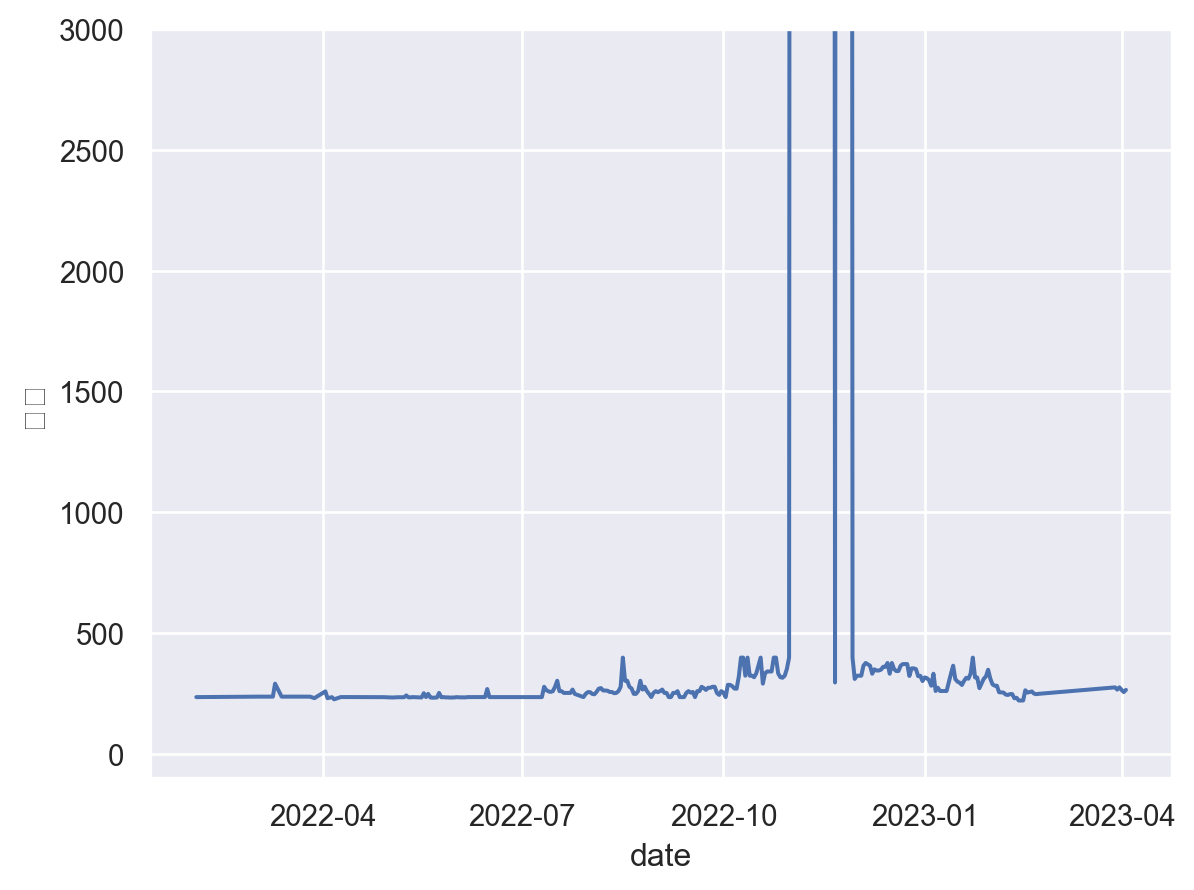

In [95]:
(
    so.Plot(train_sales.dropna().query('제품 == "B002-02920-00004"'),x='date',y='단가')
    .add(so.Line())
    .limit(y=(-100,3000))
)

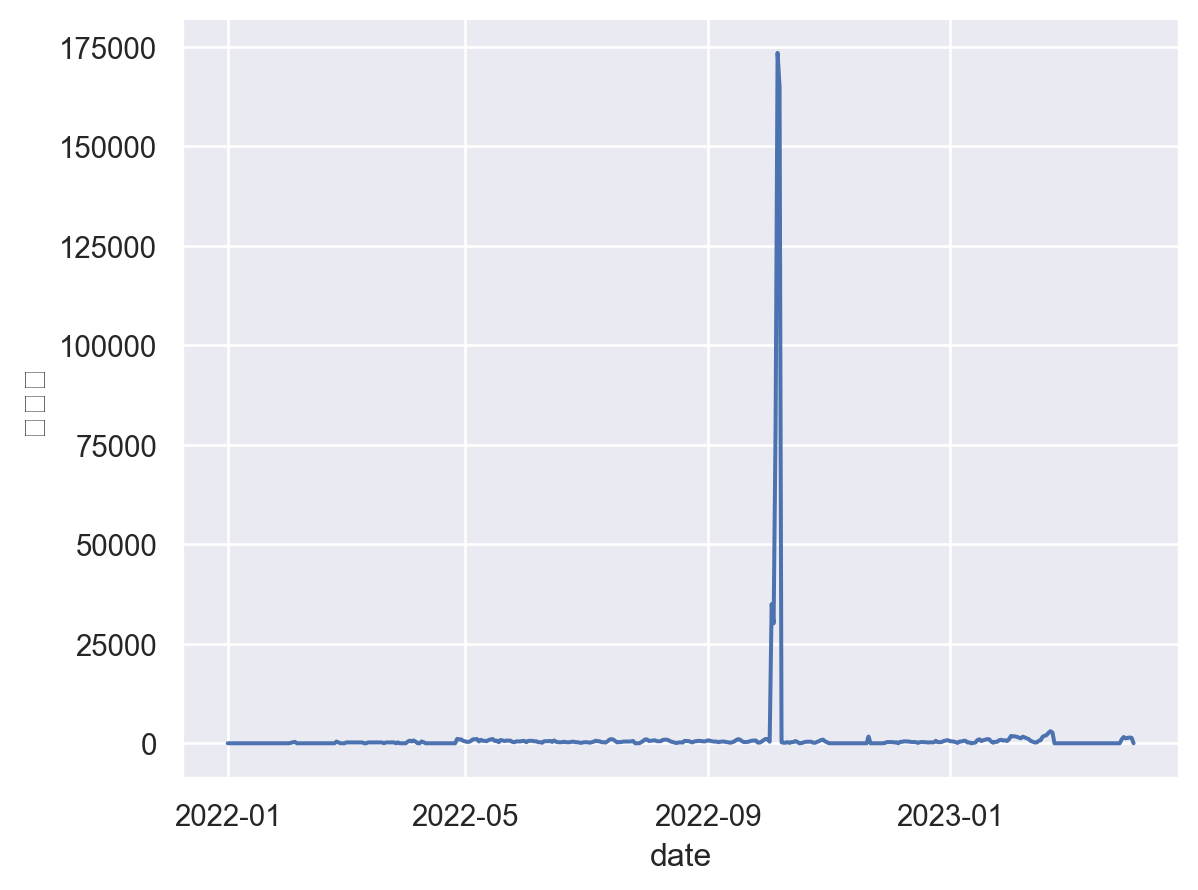

In [69]:
(
    so.Plot(train_sales.query('제품 == "B002-02920-00004"'),x='date',y='판매량')
    .add(so.Line())
)

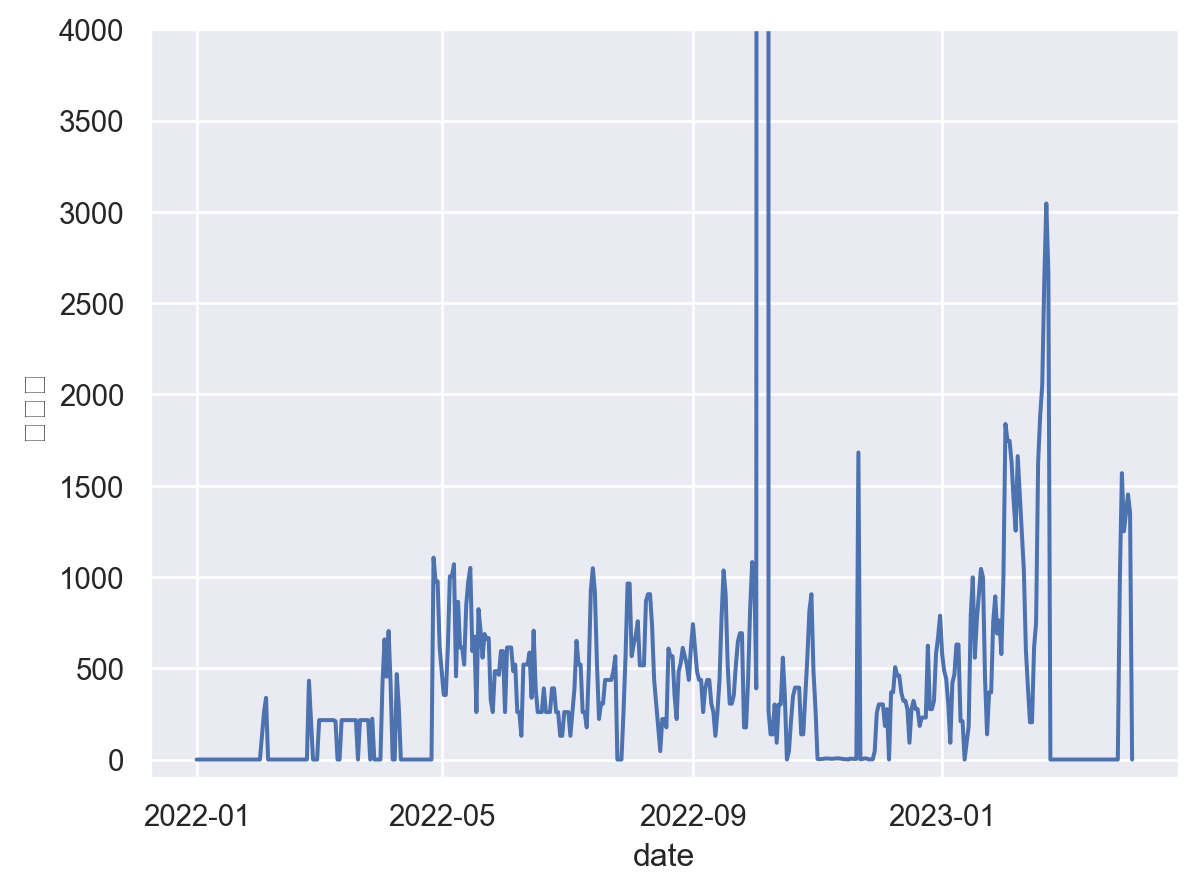

In [70]:
(
    so.Plot(train_sales.query('제품 == "B002-02920-00004"'),x='date',y='판매량')
    .add(so.Line())
    .limit(y=(-100,4000))
)

평균 판매 단가

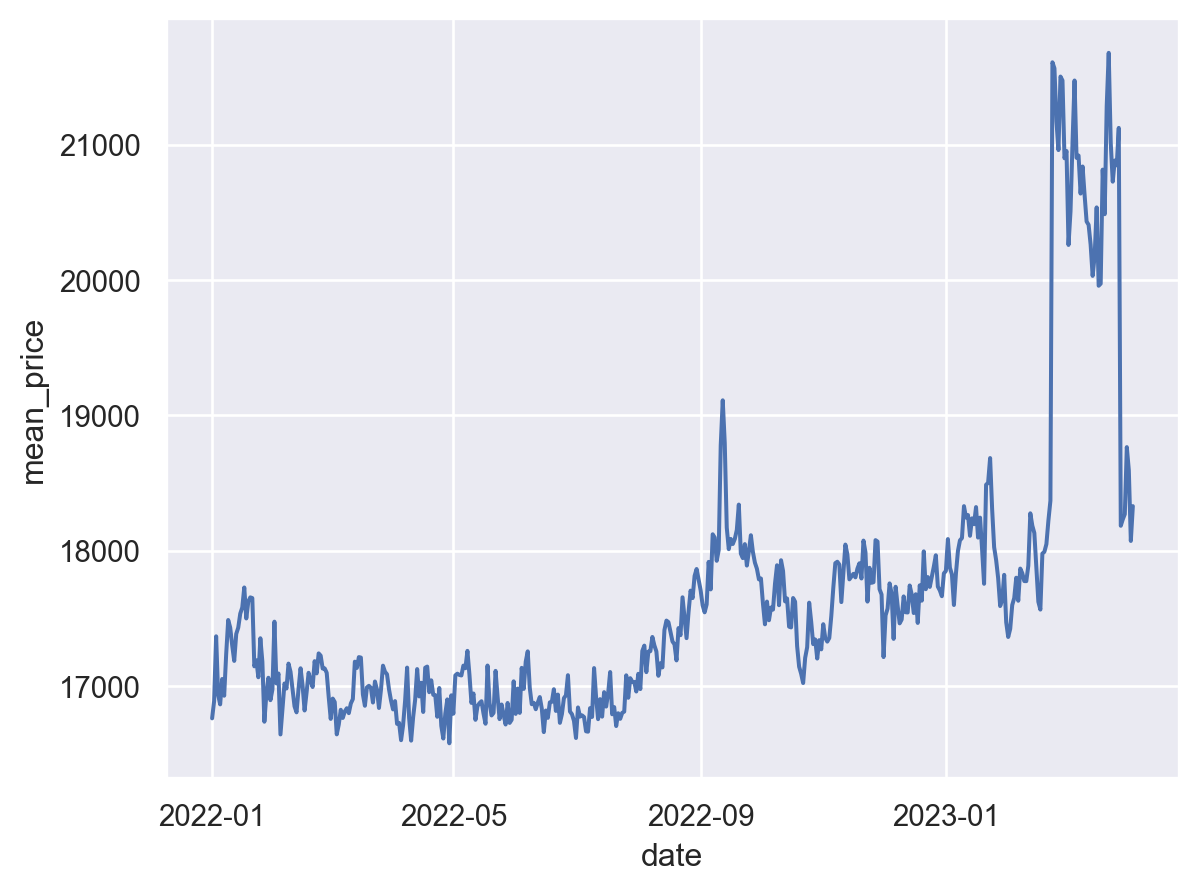

In [96]:
(
     so.Plot(train_sales.dropna().groupby(['date'])['단가'].mean().reset_index(name='mean_price'),x='date',y='mean_price')
    .add(so.Line())
    .scale(color='Set2')
)

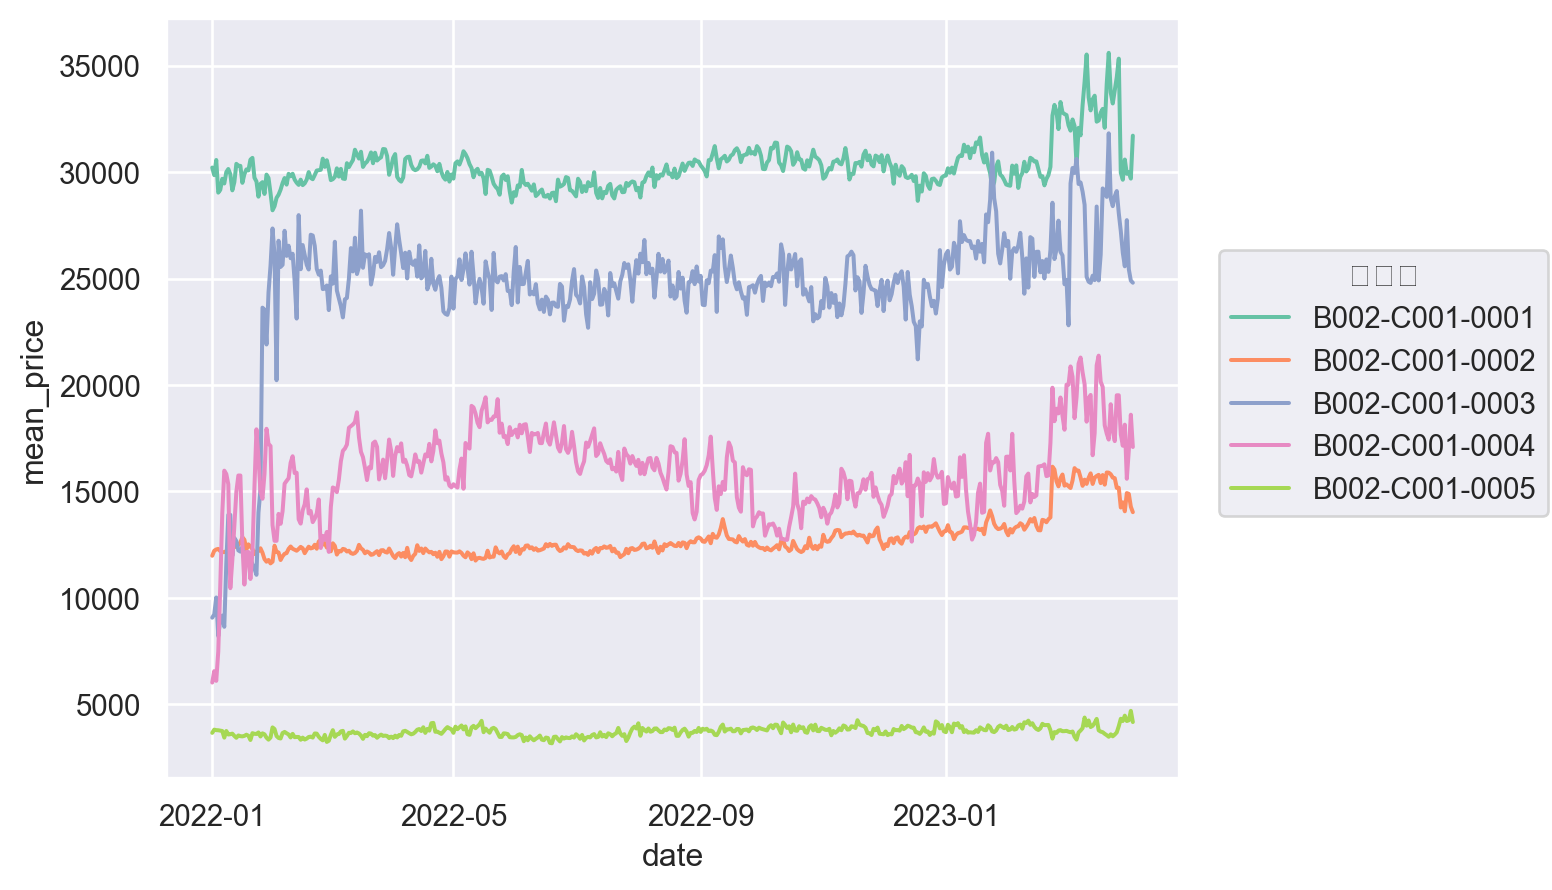

In [97]:
(
     so.Plot(train_sales.dropna().groupby(['대분류','date'])['단가'].mean().reset_index(name='mean_price'),x='date',y='mean_price',color='대분류')
    .add(so.Line())
    .scale(color='Set2')
)

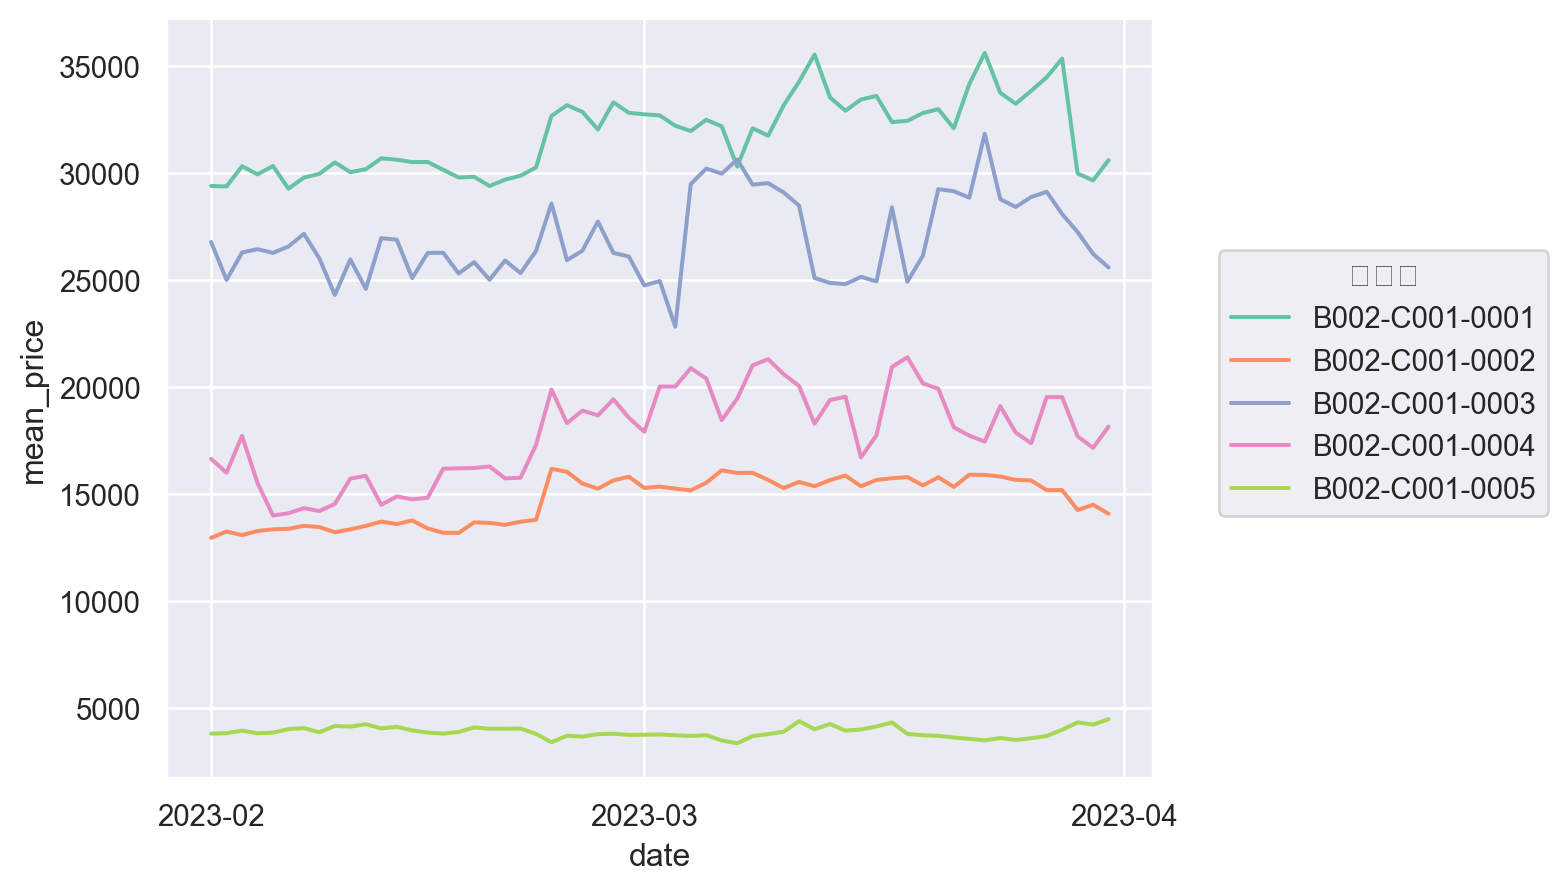

In [99]:
(
     so.Plot(train_sales.query('month in ["Feb","Mar"] and year == "2023"').dropna().groupby(['대분류','date'])['단가'].mean().reset_index(name='mean_price'),x='date',y='mean_price',color='대분류')
    .add(so.Line())
    .scale(color='Set2')
)

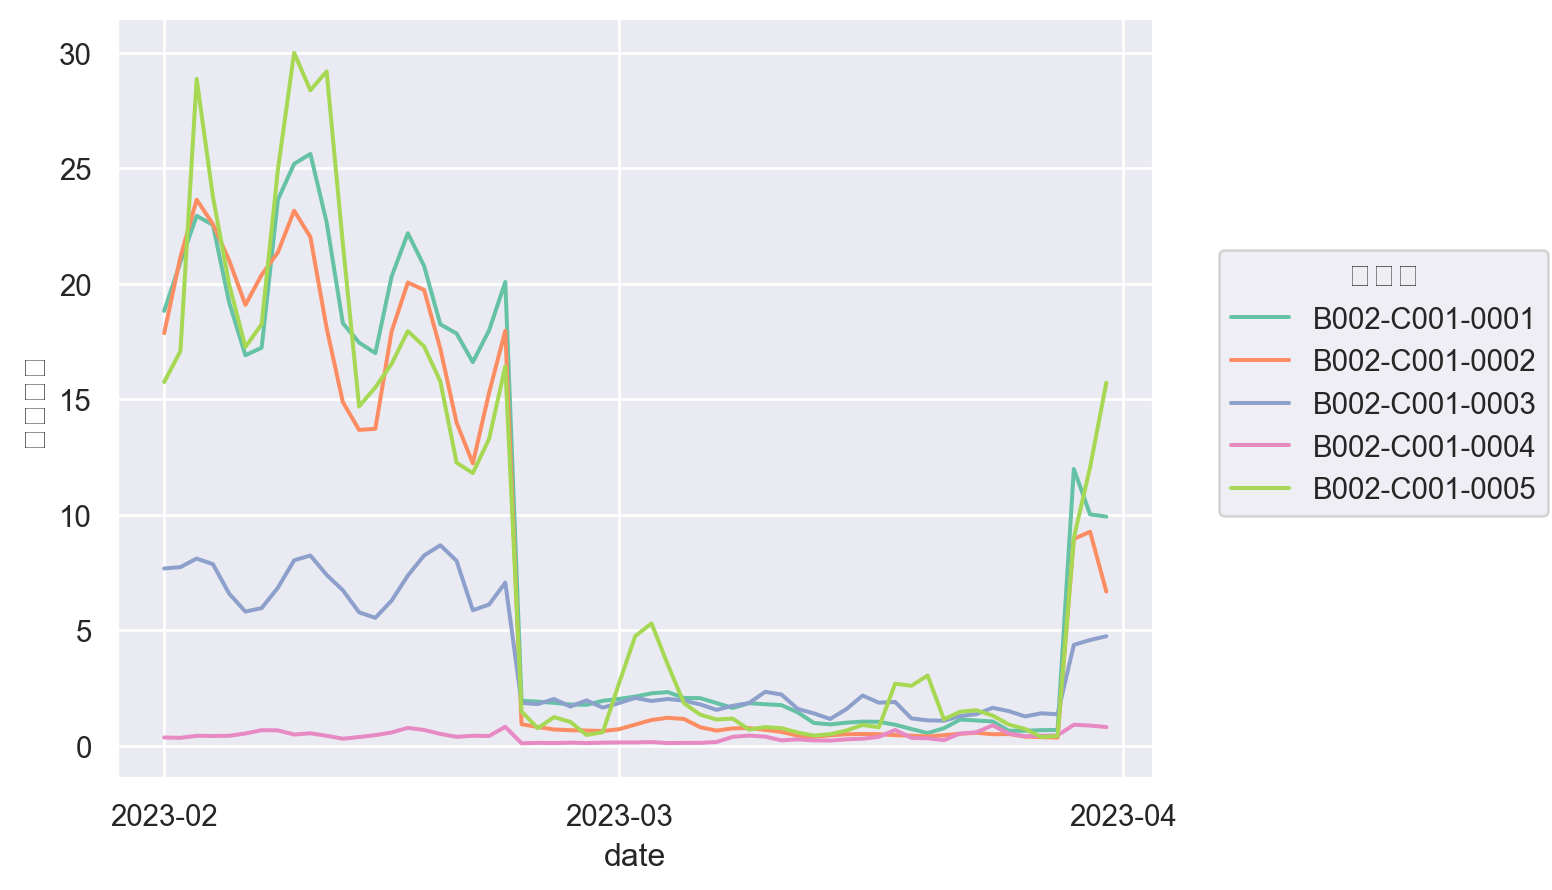

In [74]:
(
     so.Plot(train_sales.query('year == "2023" and month in ["Feb","Mar"]').groupby(['대분류','date'])['판매량'].mean().reset_index(name='평균단가'),x='date',y='평균단가',color='대분류')
    .add(so.Line())
    .scale(color='Set2')
)

In [103]:
product_info

제품                                               제품특성
0      B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1      B002-02376-00001                                        700mg x 28정
2      B002-03735-00001  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3      B002-03735-00003  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4      B002-02769-00001  HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...                 ...                                                ...
12773  B002-01994-00001  형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774  B002-02600-00002  헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775  B002-02372-00095                   사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776  B002-01318-00002  피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...
12777  B002-02473-00064  최소연령:4개월 단계별:2단계 종류:일반분유 제품형태:분말 포장형태:캔 용량:800...

[12778 rows x 2 columns]